In [2]:
%load_ext autoreload
%autoreload 2
from eden.util import configure_logging
import logging
configure_logging(logging.getLogger(),verbosity=2)
%matplotlib inline
!pwd

/home/ikea/GraphLearn/GraphLearn_examples/Abstract


In [6]:
# get data
from eden.converter.graph.gspan import gspan_to_eden
from itertools import islice


def clean(graphs):
    for g in graphs:
        for n,d in g.nodes(data=True):
            d.pop('weight')
        yield g

def get_graphs(dataset_fname='../toolsdata/bursi.pos.gspan', size=100):
    return  clean(islice(gspan_to_eden(dataset_fname),size))


#dataset_names = !cat NCI60/names
#dataset = dataset_names[4]
#dataset_fname = 'NCI60/' + dataset + '_orig_pos.gspan'
#print 'Working with dataset: %s' % dataset 


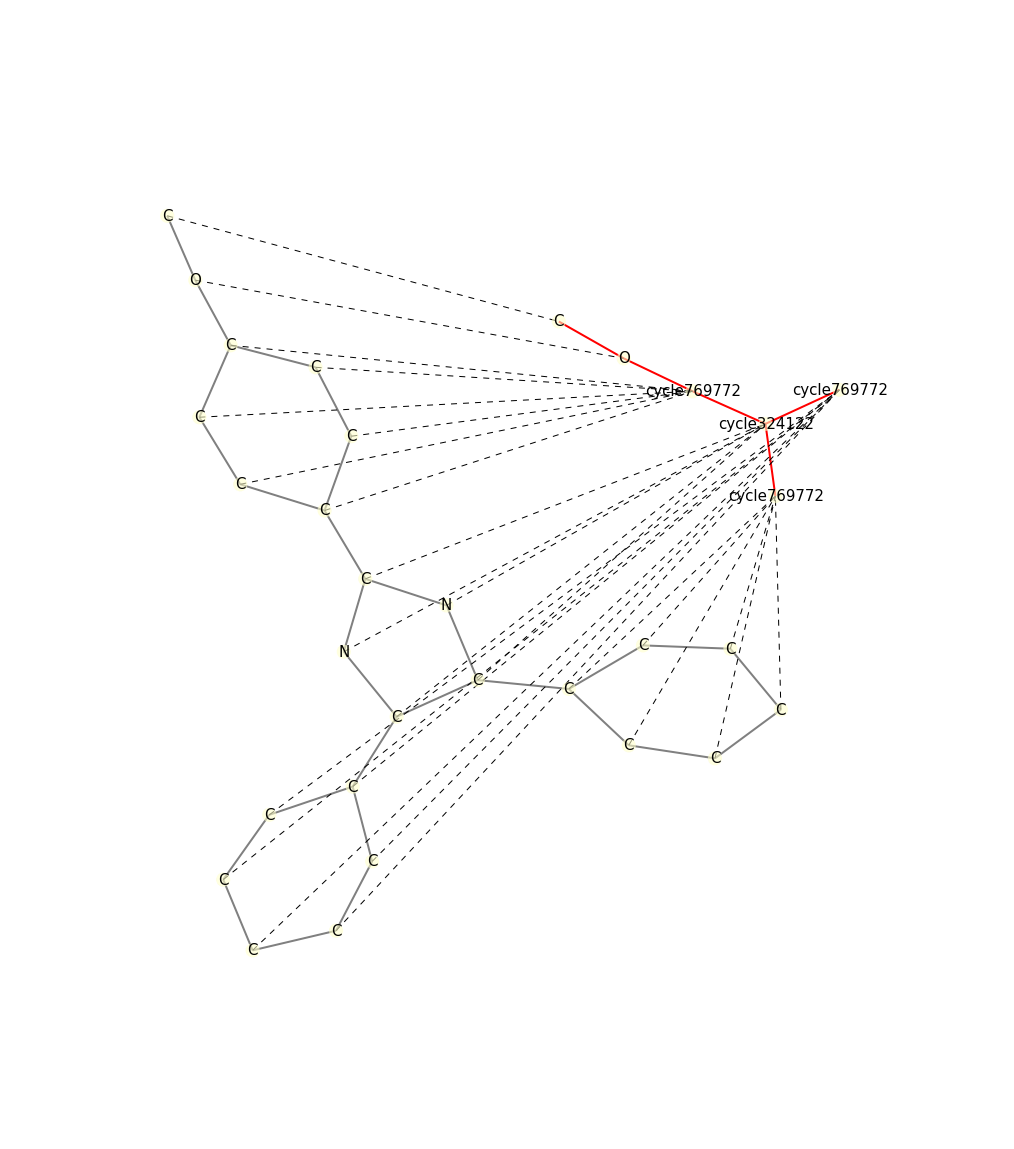

In [7]:
'''DEBUGGING VECTORIZA'''
from graphlearn.utils import draw
import graphlearn.abstract_graphs.molecules_circle as mole
from graphlearn.graphlearn import Sampler as GLS
from eden.graph import Vectorizer

vectorizer=Vectorizer()
graphs=get_graphs()
g=graphs.next()
g=vectorizer._graph_preprocessing(g)


gm=mole.MolecularWrapper(g,vectorizer,base_thickness_list=[2])
gn=gm.graph(nested=True)

#gn=vectorizer._graph_preprocessing(gn)
gn=vectorizer._edge_to_vertex_transform(gn)
draw.graphlearn(gn,size=20, abstract_color='red', contract=True,ignore_for_layout='nesting')
v=vectorizer.transform_single(gn)

DEMONSTRATING GRAPH MANAGER
grammar example 0


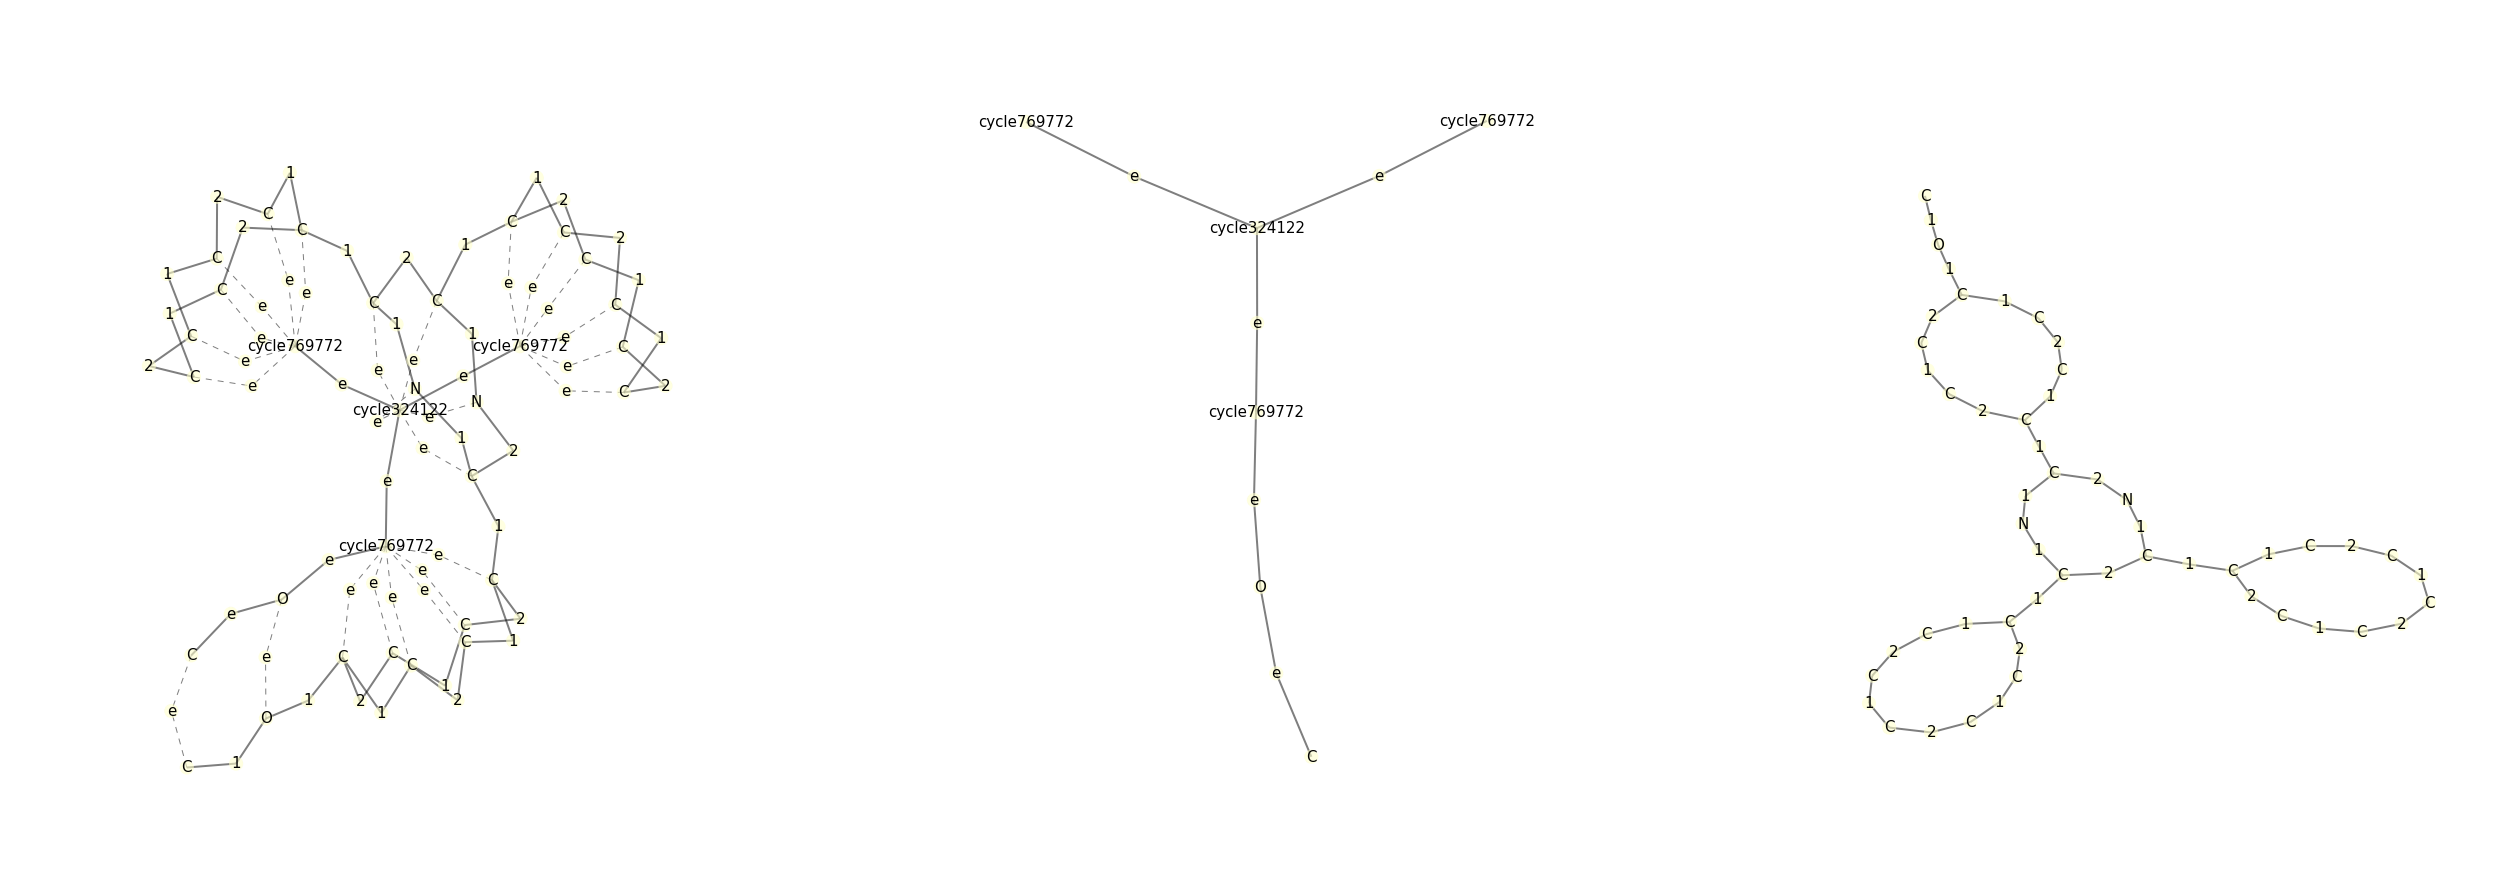

grammar example 1


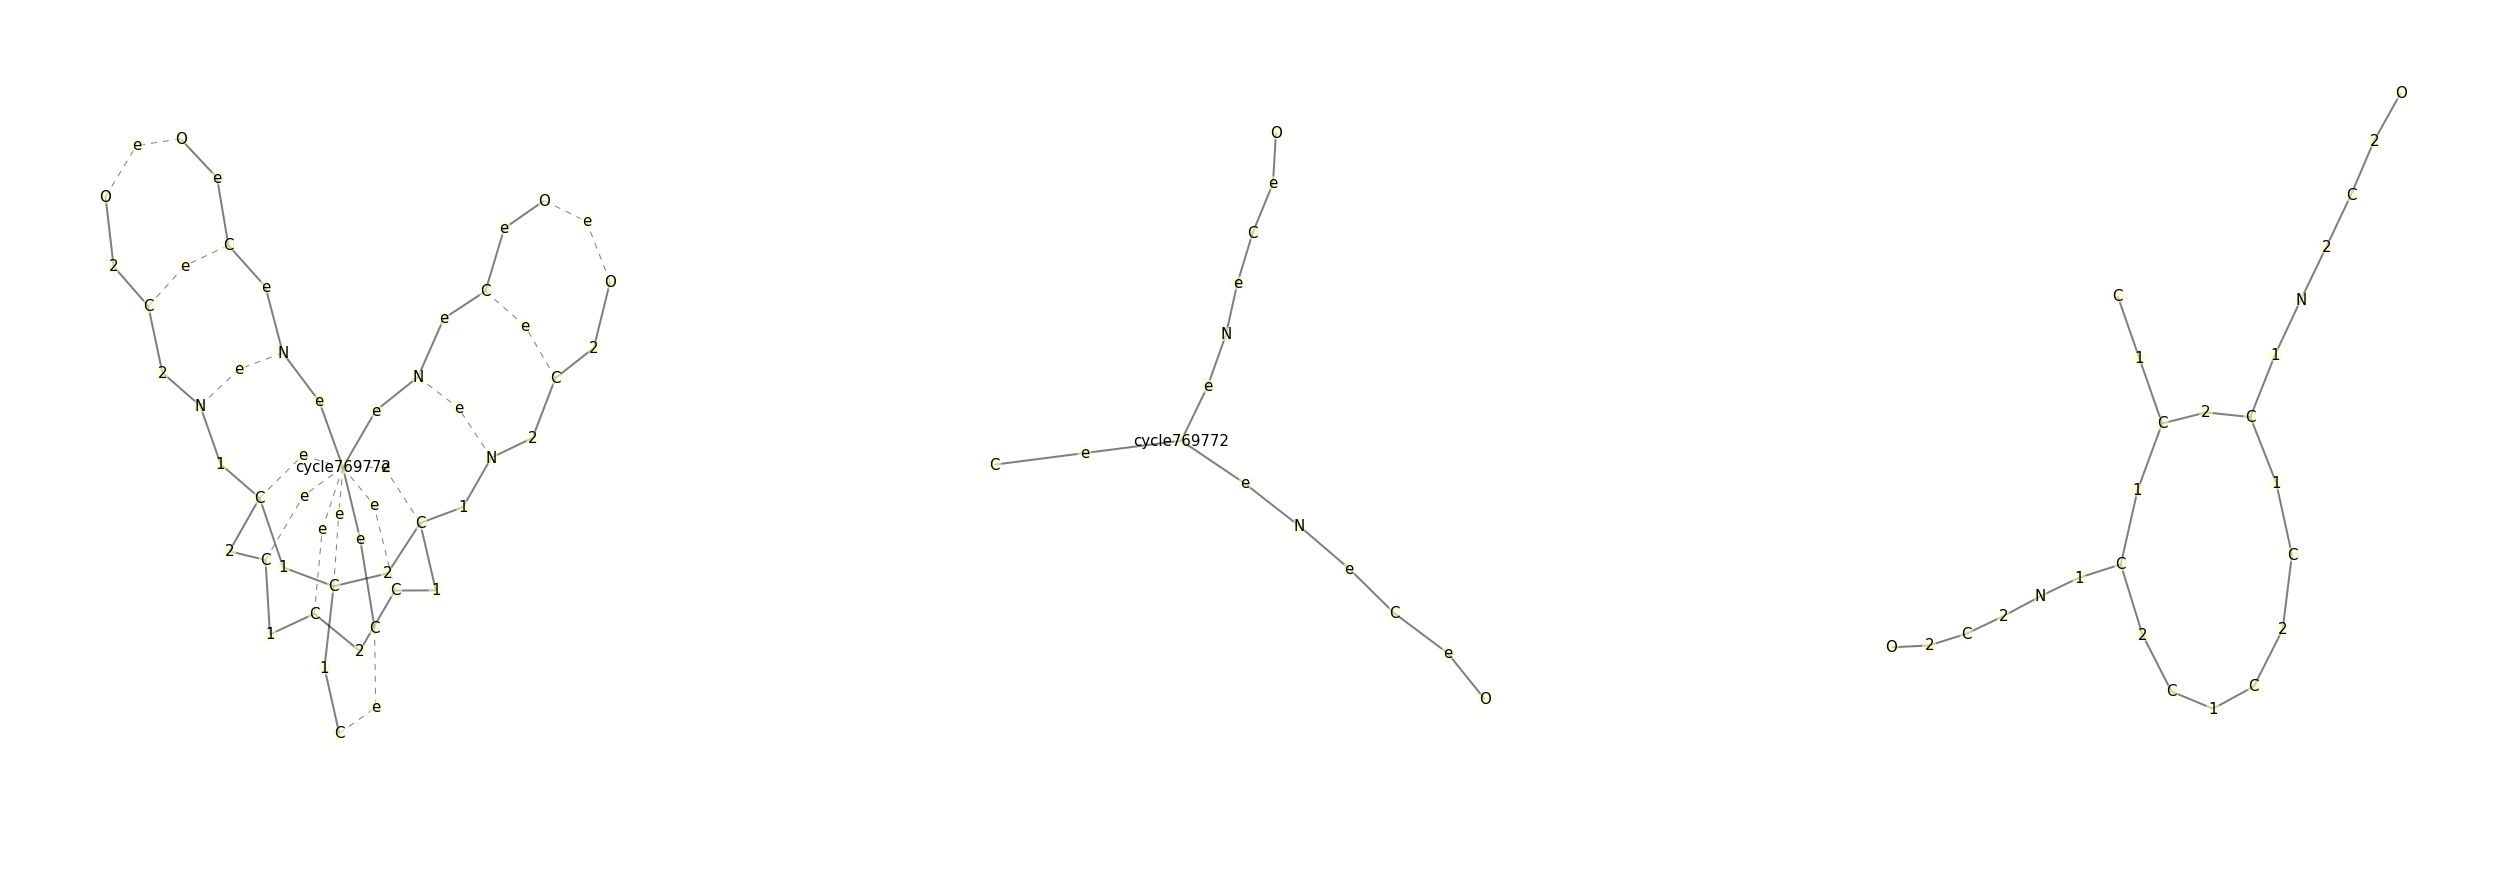

DEMONSTRATING EXTRACTION


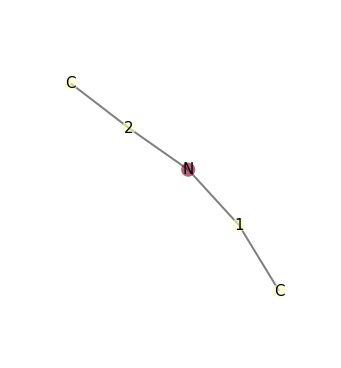

test {'node': True, 'hlabel': [771267], 'ID': 0, 'label': 'C'}


In [8]:
'''TESTING EXTRACTION AND GRAPHMANAGER'''
from graphlearn.utils import draw
import graphlearn.abstract_graphs.molecules as mole
from graphlearn.graphlearn import Sampler as GLS
from eden.graph import Vectorizer

vectorizer=Vectorizer()

print 'DEMONSTRATING GRAPH MANAGER'
graphs=get_graphs()

for i in range(2):
    print 'grammar example %d' % i
    g=graphs.next()
    gm=mole.MolecularWrapper(g,vectorizer,base_thickness_list=[2])
    #g=gm.graph(nested=True)
    #print g.nodes(data=True)
    #g.node[0].pop('weight')
    #vec=vectorizer.transform_single(g)
    draw.graphlearn([gm.graph(nested=True),gm.abstract_graph(),gm.base_graph()], size = 15,vertex_label = 'label',contract=False)

    
print 'DEMONSTRATING EXTRACTION'  
radius_list=[0,2]
thickness_list=[2,4]
base_thickness_list=[2]
argz=(gm,radius_list,thickness_list,Vectorizer(),2**20-1,lambda x,y:True, base_thickness_list)

cips=gm.all_core_interface_pairs(thickness_list=[2],radius_list=[0,1],hash_bitmask=2**20-1)
draw.graphlearn(cips[0][0].graph, contract=False)


g=gm.graph(nested=False)
print 'test', g.nodes(data=True)[0][1]
#g.node[0].pop('weight')
vec=vectorizer.transform_single(g)

In [13]:
%%time
'''
learning a grammar
'''
import graphlearn.abstract_graphs.molecules as mole
from graphlearn.graphlearn import Sampler as GLS
graphs = get_graphs(size=200)
sampler=GLS(radius_list=[0,1],thickness_list=[1], min_cip_count=2, min_interface_count=2, preprocessor=mole.PreProcessor(base_thickness_list=[2]))
sampler.fit(graphs,grammar_n_jobs=1,grammar_batch_size=1)
sampler.save('tmp/mole_ubergrammar.ge')


fitting was asked with n=1

Classifier:
SGDClassifier(alpha=0.000862305638646, average=False, class_weight=None,
       epsilon=0.1, eta0=0.861084532653, fit_intercept=True, l1_ratio=0.15,
       learning_rate='constant', loss='log', n_iter=67, n_jobs=1,
       penalty='elasticnet', power_t=0.292435366053, random_state=None,
       shuffle=True, verbose=0, warm_start=False)

Predictive performance:
            accuracy: 1.000 +- 0.000
           precision: 1.000 +- 0.000
              recall: 1.000 +- 0.000
                  f1: 1.000 +- 0.000
   average_precision: 1.000 +- 0.000
             roc_auc: 1.000 +- 0.000
#instances: 200  #interfaces: 50   #cores: 71   #core-interface-pairs: 224
Saved model: tmp/mole_ubergrammar.ge
CPU times: user 21.8 s, sys: 1.82 s, total: 23.7 s
Wall time: 34.6 s


interface id: 553552 [23 options]


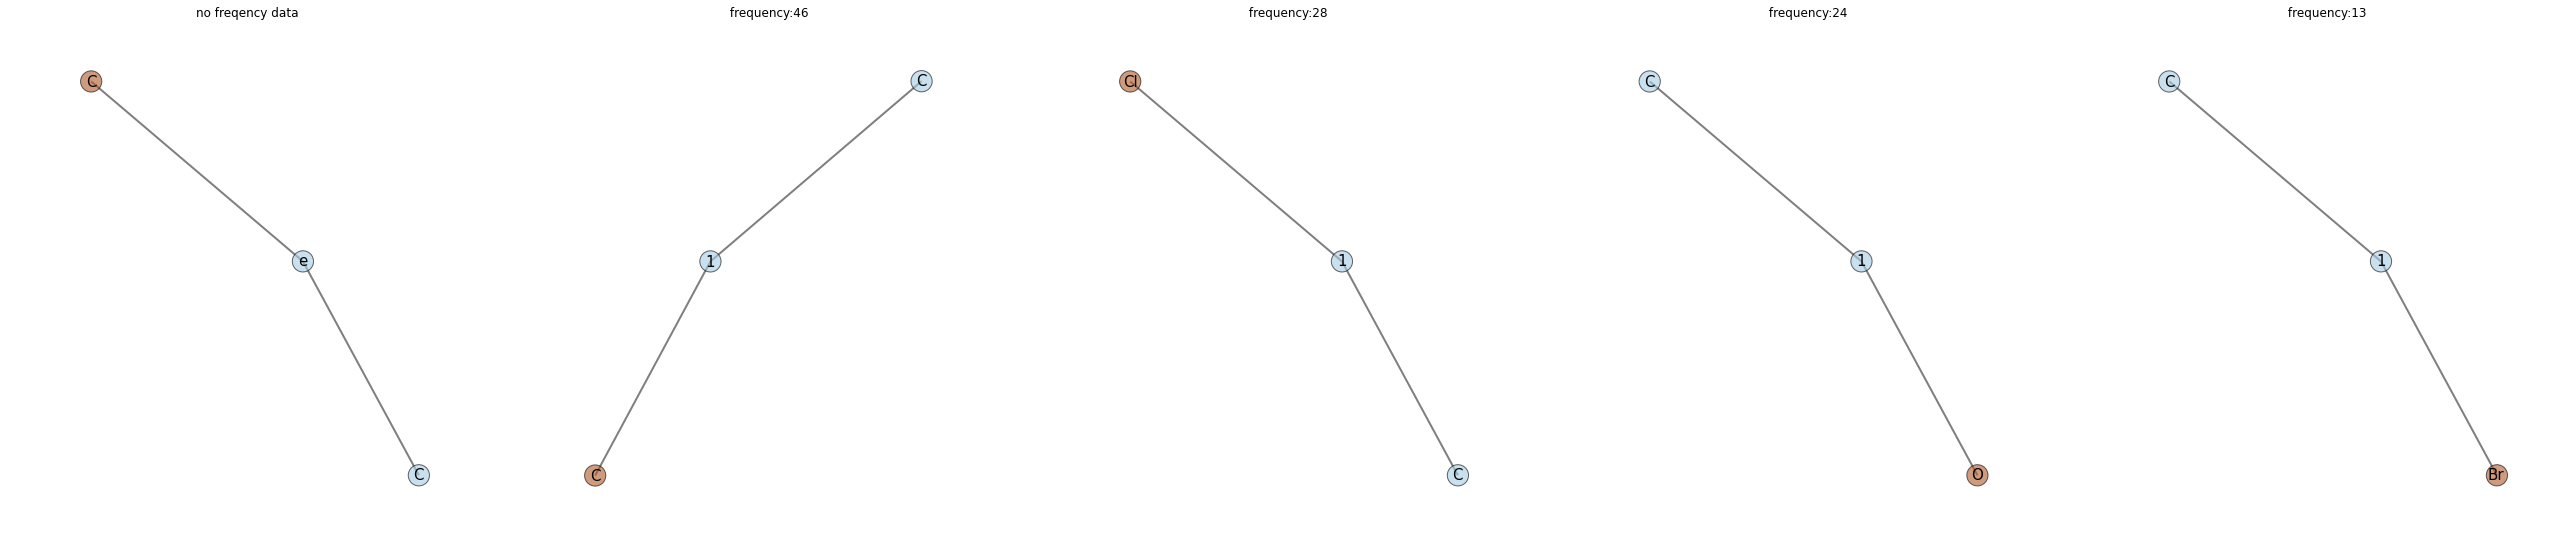

interface id: 646356 [16 options]


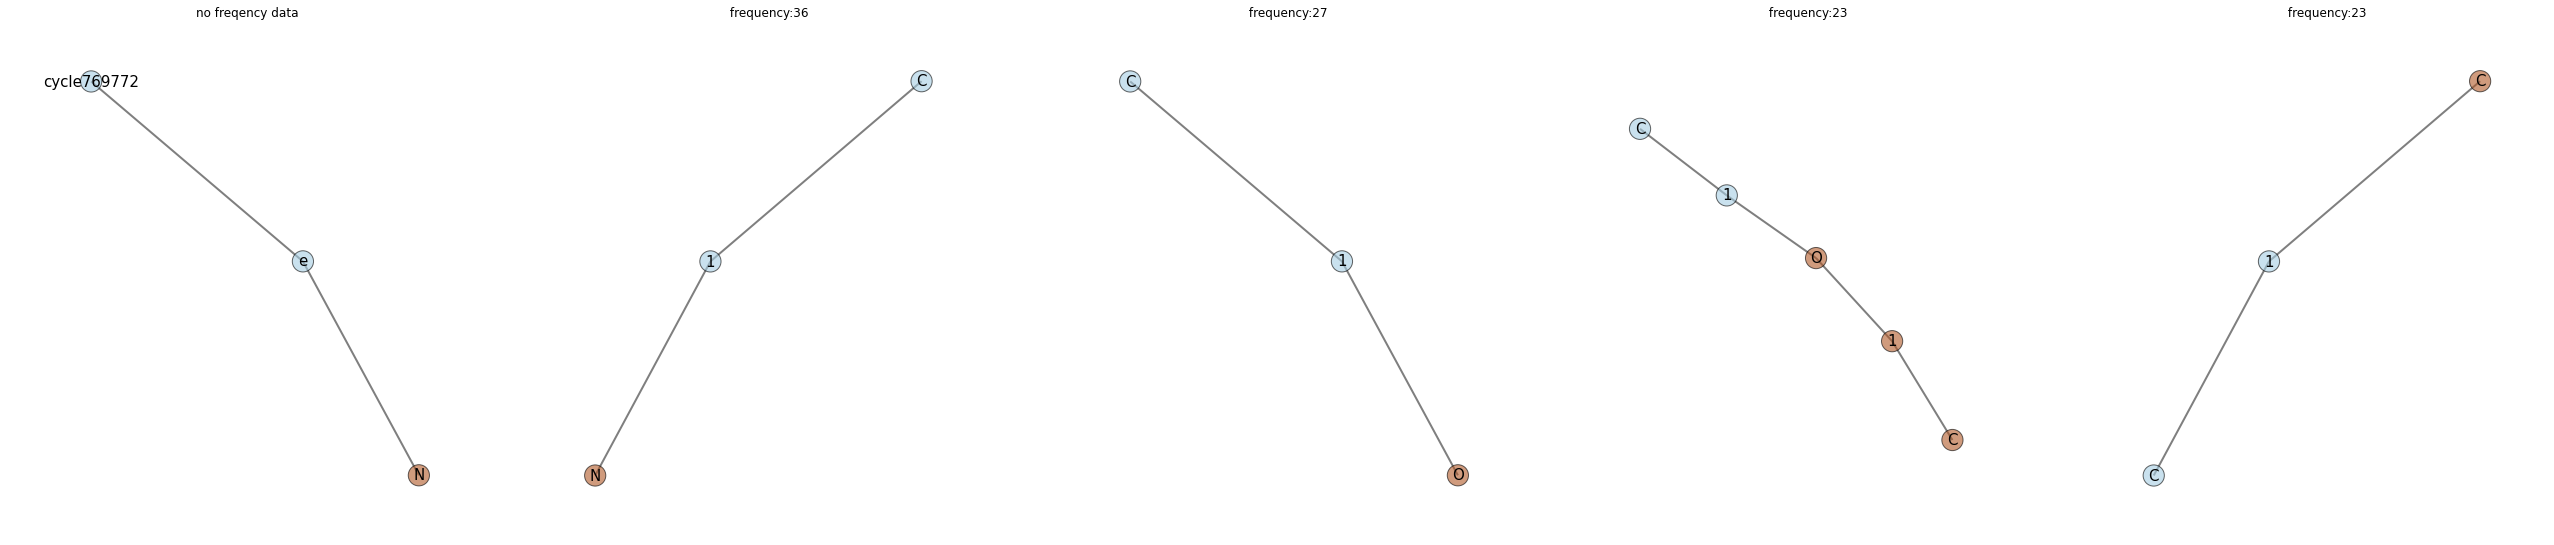

interface id: 735458 [15 options]


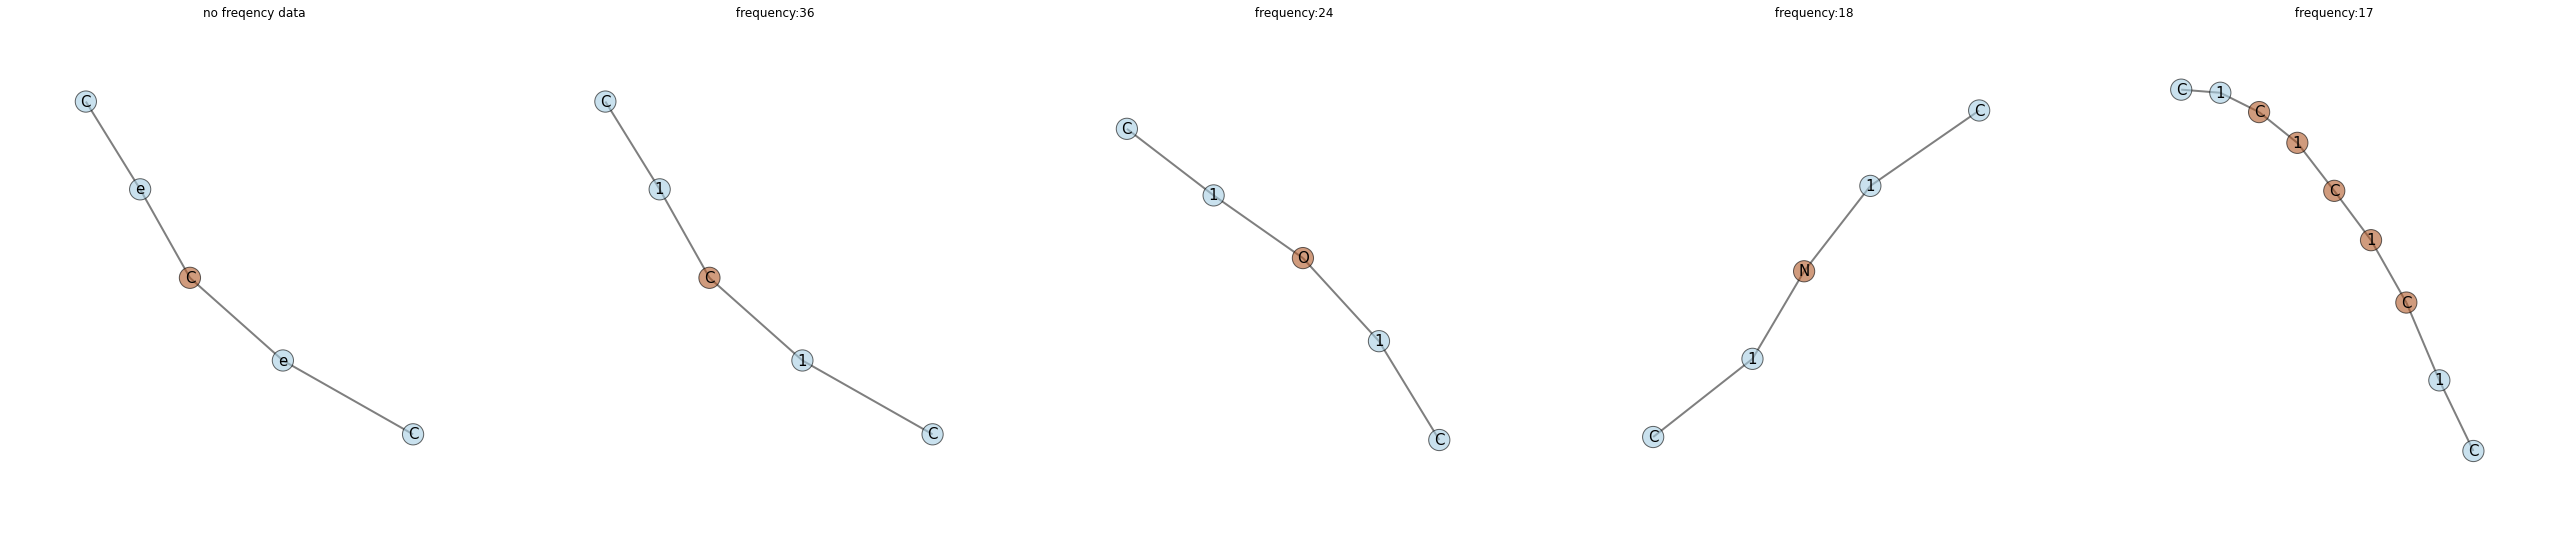

interface id: 151696 [15 options]


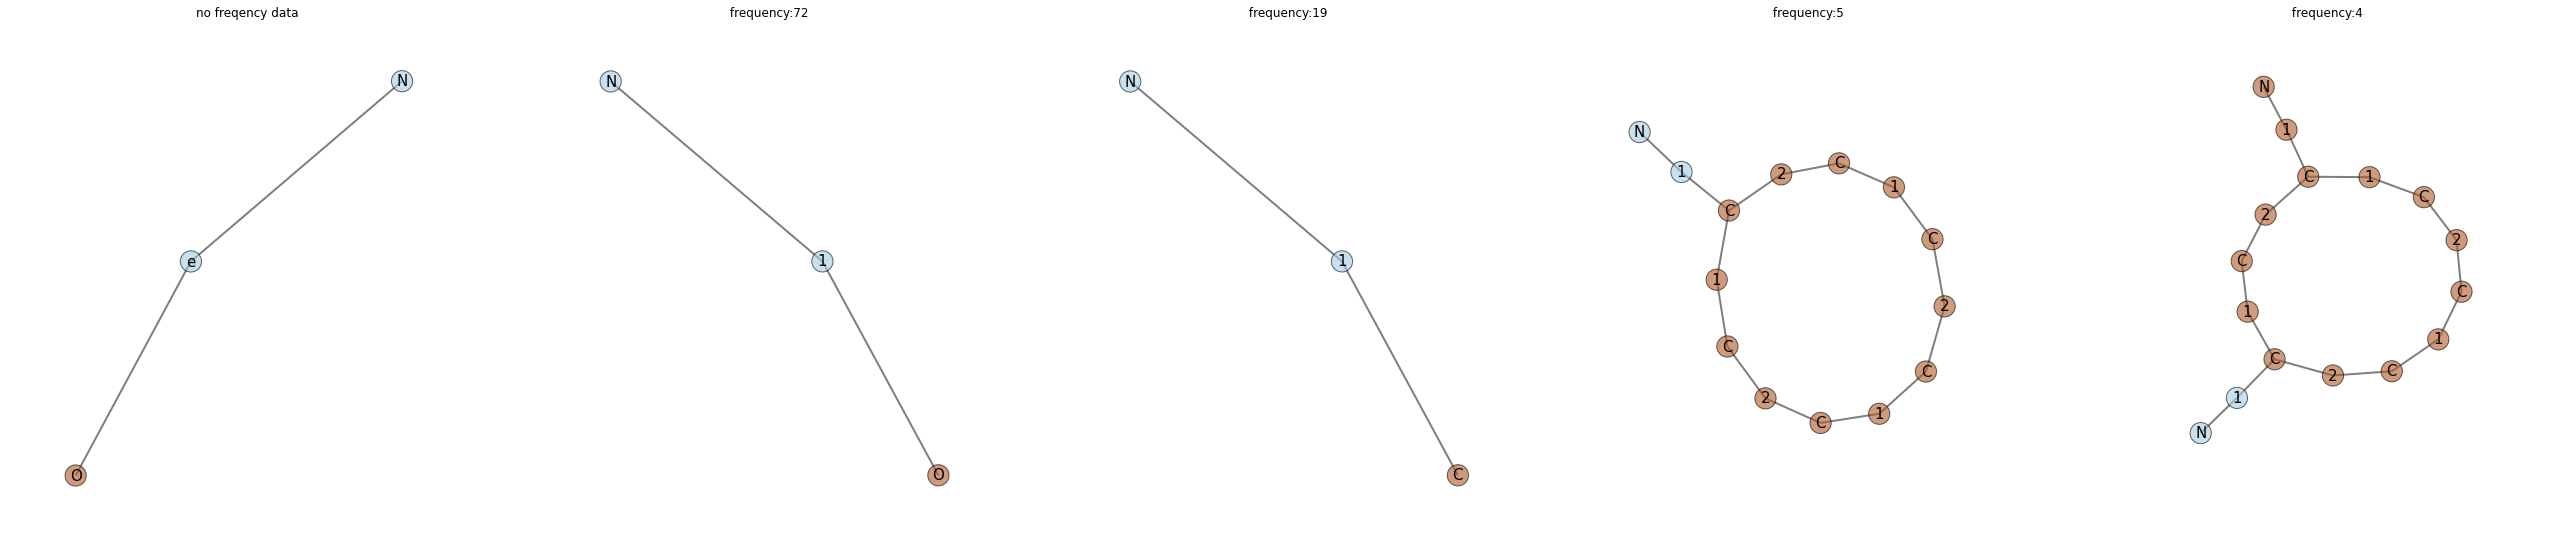

interface id: 538594 [14 options]


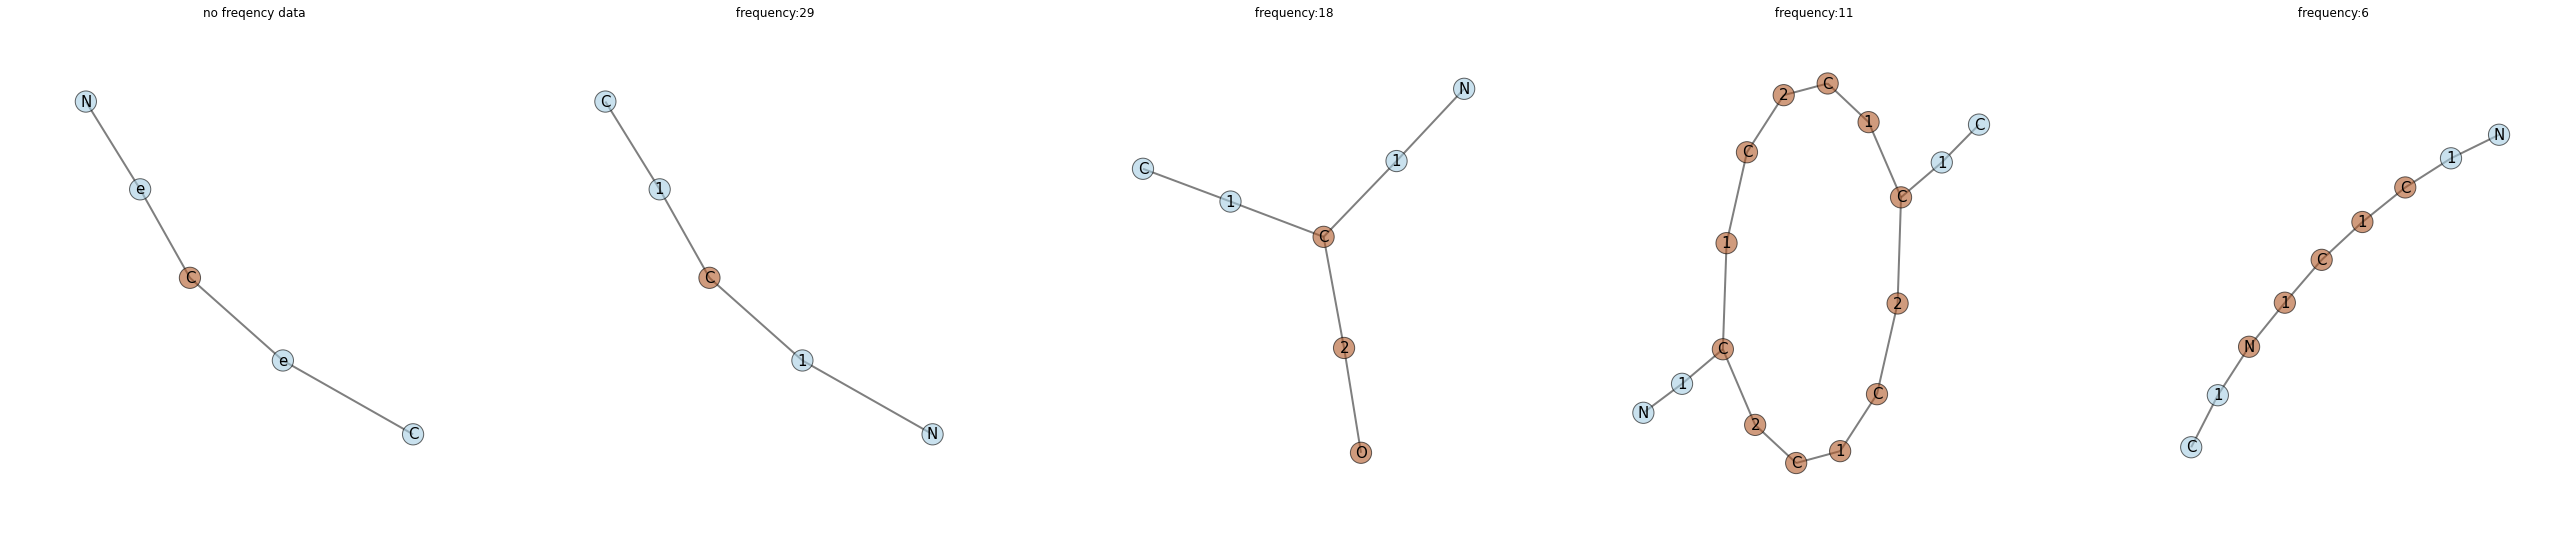

In [14]:
#draw production rules
draw.draw_grammar(sampler.lsgg.productions,n_productions=5,n_graphs_per_production=5,
                     n_graphs_per_line=5, size=9, contract=False,
                     colormap='Paired', invert_colormap=False,node_border=1,
                     vertex_alpha=0.6, edge_alpha=0.5, node_size=450, abstract_interface=True)

    

preprocessing grammar
_sample_notes: None
accept_static_penalty: 0.0
batch_size: 1
    burnin: 0
estimatorobject: <graphlearn.estimator.Wrapper instance at 0x7fd1d57e55a8>
feasibility_checker: <graphlearn.feasibility.FeasibilityChecker instance at 0x7fd1d57e5248>
generator_mode: False
hash_bitmask: 1048575
improving_linear_start: 0
improving_penalty_per_step: 0.02
improving_threshold: 50
keep_duplicates: True
      lsgg: <graphlearn.localsubstitutablegraphgrammar.LocalSubstitutableGraphGrammar object at 0x7fd1d56db690>
max_core_size_diff: 2
    n_jobs: 1
   n_steps: 100
      nbit: 20
node_entity_check: <function <lambda> at 0x7fd1bff581b8>
 omit_seed: False
postprocessor: <graphlearn.processing.PostProcessor object at 0x7fd1d5727150>
preprocessor: <graphlearn.abstract_graphs.molecules.PreProcessor object at 0x7fd1d56dbb90>
probabilistic_core_choice: False
proposal_probability: False
quick_skip_orig_cip: True
radius_list: [0, 2]
random_state: None
sample_path: None
sampling_interval: 2

/home/ikea/.local/lib/python2.7/site-packages/matplotlib/text.py:52: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  if rotation in ('horizontal', None):
/home/ikea/.local/lib/python2.7/site-packages/matplotlib/text.py:54: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  elif rotation == 'vertical':


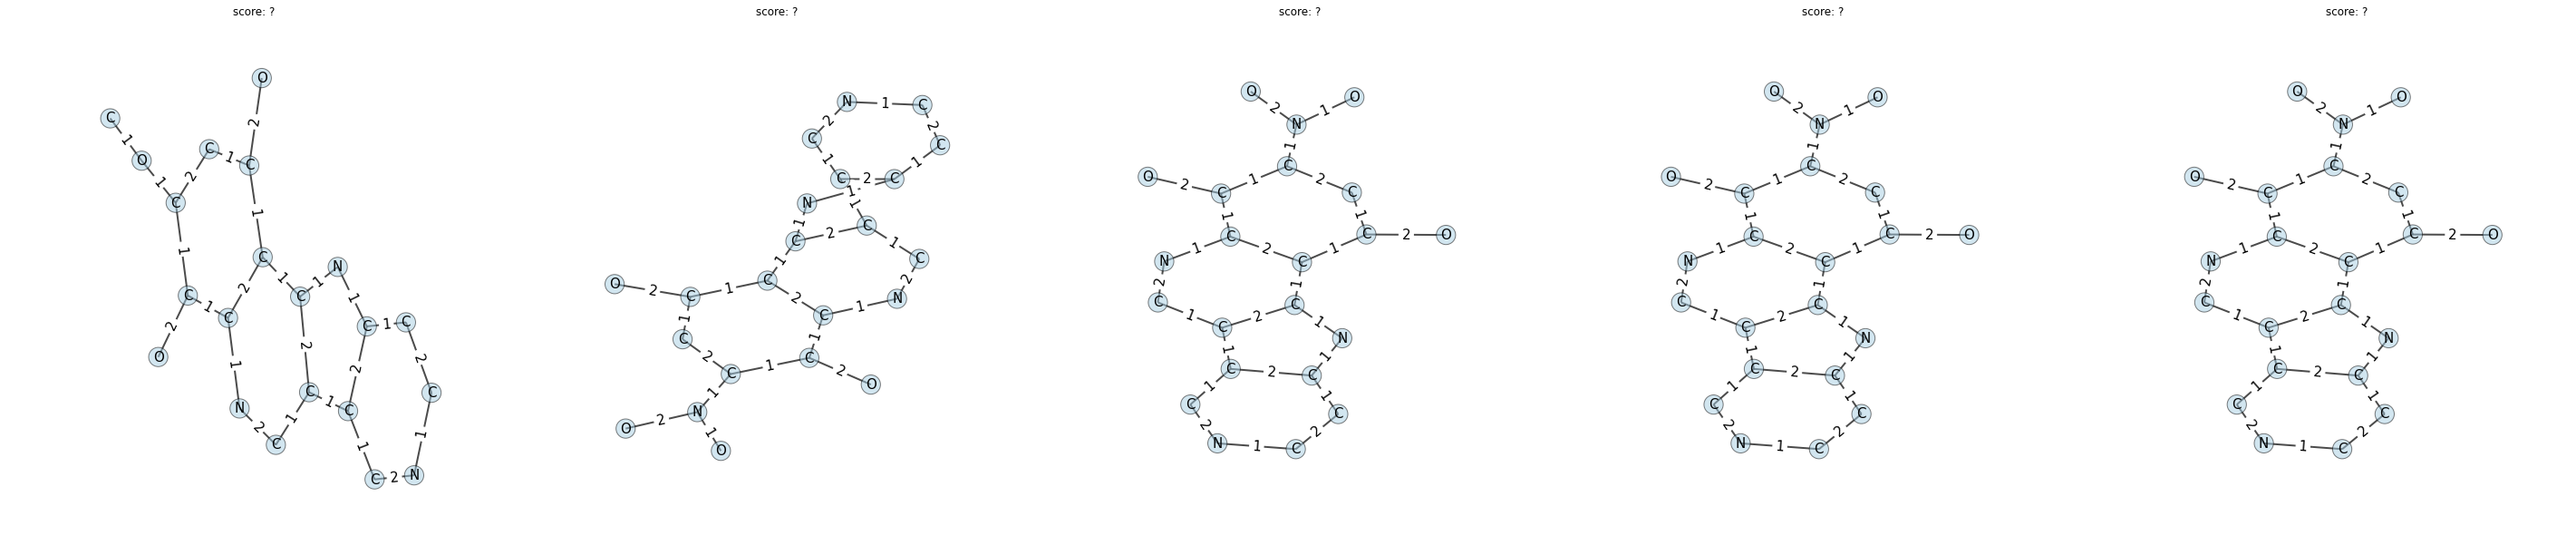

_propose_graph: iteration 0 ; core 0 of 1 ; original_cips tried  0
_propose_graph: iteration 1 ; core 0 of 1 ; original_cips tried  0
_propose_graph: iteration 2 ; core 0 of 1 ; original_cips tried  0
_propose_graph: iteration 3 ; core 0 of 1 ; original_cips tried  0
_propose_graph: iteration 4 ; core 0 of 1 ; original_cips tried  0
_propose_graph: iteration 5 ; core 0 of 1 ; original_cips tried  0
_propose_graph: iteration 6 ; core 0 of 1 ; original_cips tried  0
_propose_graph: iteration 7 ; core 0 of 1 ; original_cips tried  0
_propose_graph: iteration 8 ; core 0 of 1 ; original_cips tried  0
_propose_graph: iteration 9 ; core 0 of 1 ; original_cips tried  0
_propose_graph: iteration 10 ; core 0 of 1 ; original_cips tried  0
_propose_graph: iteration 11 ; core 0 of 1 ; original_cips tried  0
_propose_graph: iteration 12 ; core 0 of 1 ; original_cips tried  0
_propose_graph: iteration 13 ; core 0 of 1 ; original_cips tried  0
_propose_graph: iteration 14 ; core 0 of 1 ; original_cips

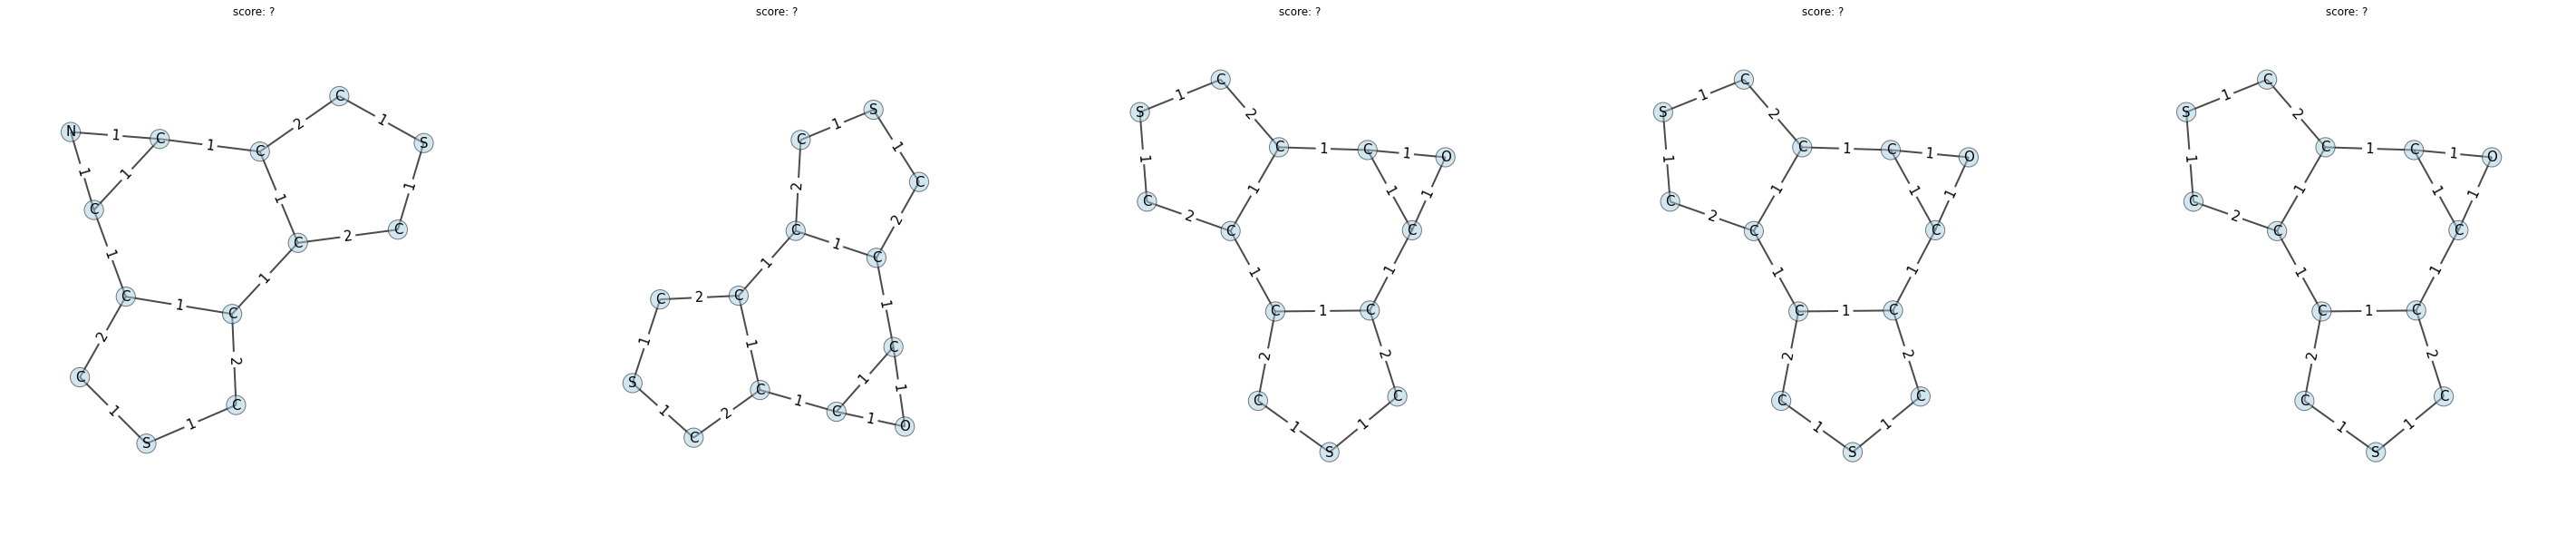

_propose_graph: iteration 0 ; core 0 of 14 ; original_cips tried  0
_propose_graph: iteration 1 ; core 0 of 3 ; original_cips tried  0
_propose_graph: iteration 2 ; core 0 of 3 ; original_cips tried  0
_propose_graph: iteration 3 ; core 0 of 3 ; original_cips tried  0
_propose_graph: iteration 4 ; core 0 of 3 ; original_cips tried  1
_propose_graph: iteration 5 ; core 0 of 15 ; original_cips tried  2
_propose_graph: iteration 6 ; core 0 of 22 ; original_cips tried  2
_propose_graph: iteration 7 ; core 0 of 15 ; original_cips tried  0
_propose_graph: iteration 8 ; core 0 of 15 ; original_cips tried  1
_propose_graph: iteration 9 ; core 0 of 3 ; original_cips tried  0
_propose_graph: iteration 10 ; core 0 of 15 ; original_cips tried  0
_propose_graph: iteration 11 ; core 0 of 15 ; original_cips tried  0
_propose_graph: iteration 12 ; core 0 of 1 ; original_cips tried  1
_propose_graph: iteration 13 ; core 0 of 1 ; original_cips tried  0
_propose_graph: iteration 14 ; core 0 of 15 ; origi

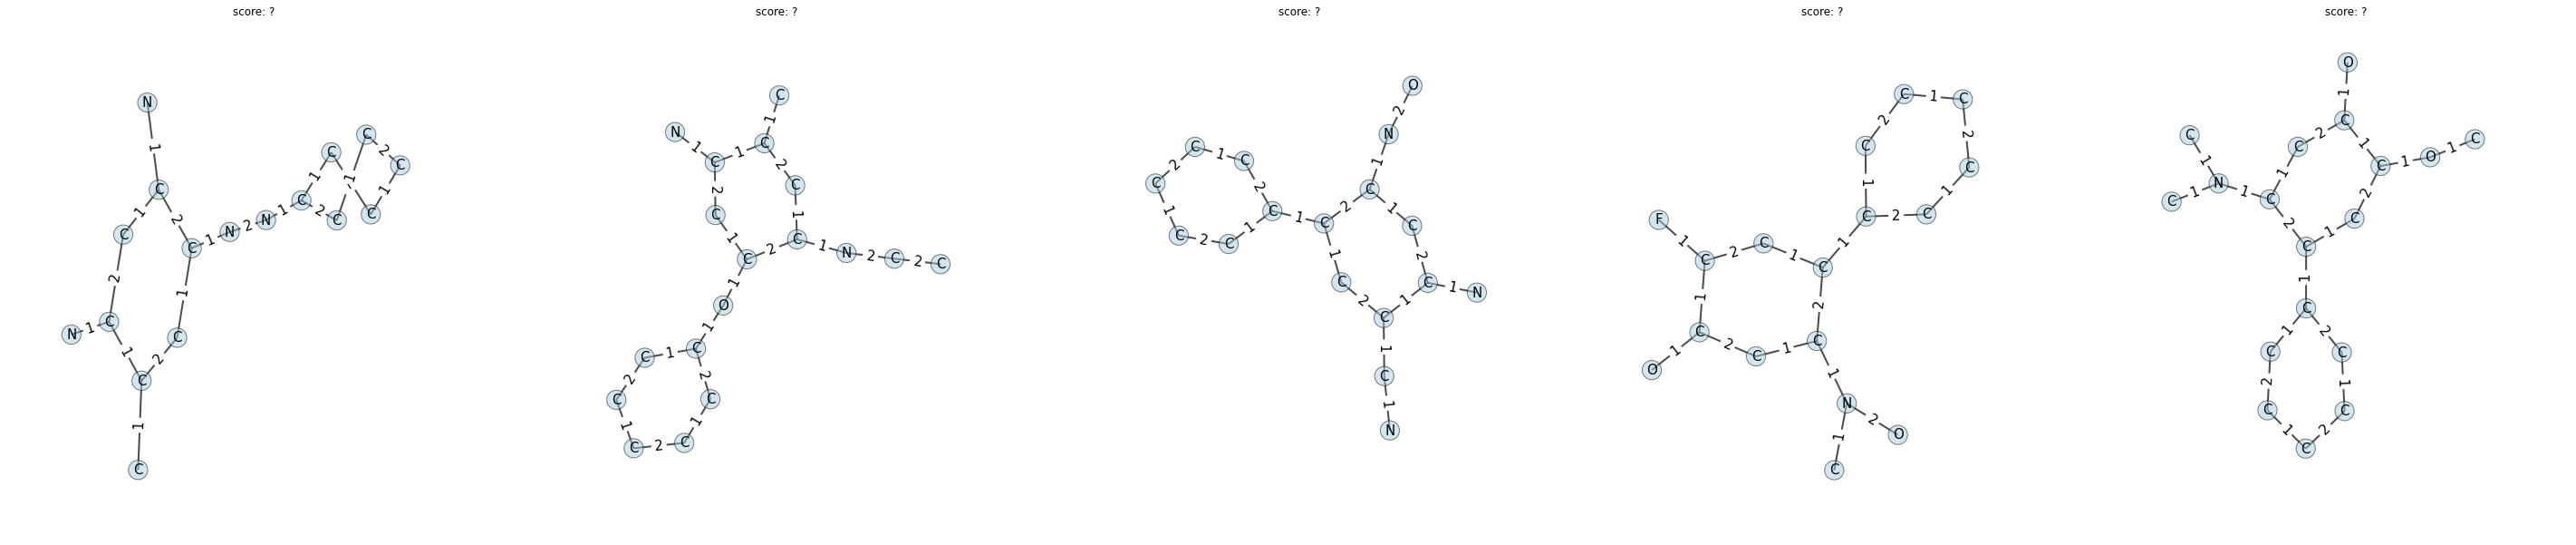

_propose_graph: iteration 0 ; core 0 of 15 ; original_cips tried  0
_propose_graph: iteration 1 ; core 0 of 15 ; original_cips tried  0
_propose_graph: iteration 2 ; core 0 of 15 ; original_cips tried  0
_propose_graph: iteration 3 ; core 0 of 15 ; original_cips tried  0
_propose_graph: iteration 4 ; core 0 of 15 ; original_cips tried  0
_propose_graph: iteration 5 ; core 0 of 15 ; original_cips tried  1
_propose_graph: iteration 6 ; core 0 of 15 ; original_cips tried  0
_propose_graph: iteration 7 ; core 0 of 15 ; original_cips tried  0
_propose_graph: iteration 8 ; core 0 of 15 ; original_cips tried  0
_propose_graph: iteration 9 ; core 0 of 15 ; original_cips tried  1
_propose_graph: iteration 10 ; core 0 of 15 ; original_cips tried  0
_propose_graph: iteration 11 ; core 0 of 15 ; original_cips tried  4
_propose_graph: iteration 12 ; core 0 of 15 ; original_cips tried  0
_propose_graph: iteration 13 ; core 0 of 15 ; original_cips tried  1
_propose_graph: iteration 14 ; core 0 of 15 

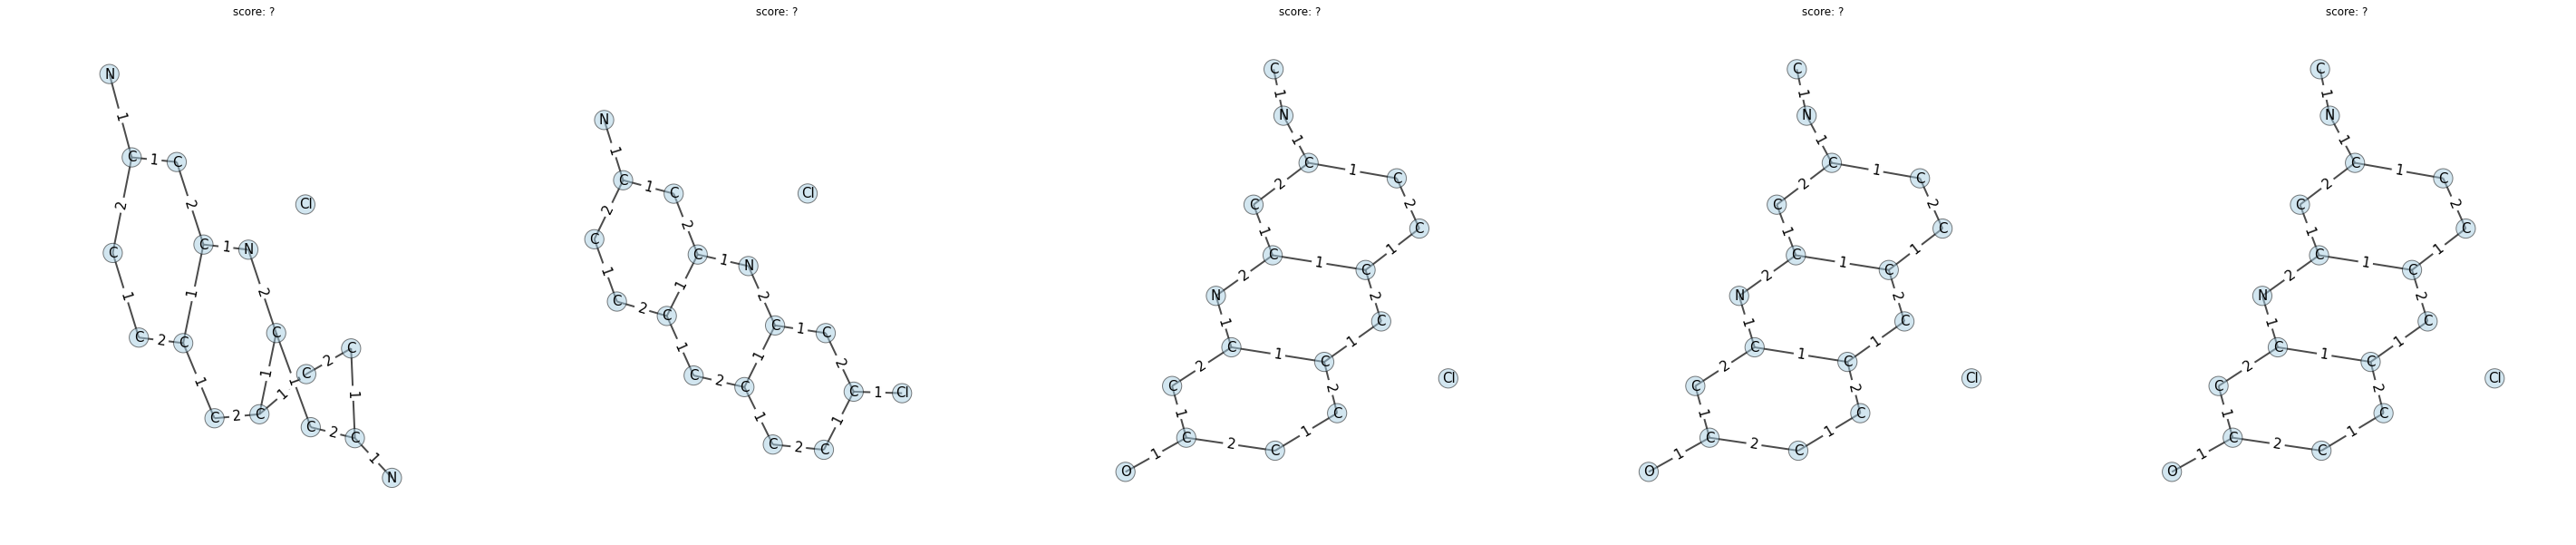

_propose_graph: iteration 0 ; core 0 of 2 ; original_cips tried  0
_propose_graph: iteration 1 ; core 0 of 3 ; original_cips tried  0
_propose_graph: iteration 2 ; core 0 of 3 ; original_cips tried  0
_propose_graph: iteration 3 ; core 0 of 3 ; original_cips tried  0
_propose_graph: iteration 4 ; core 0 of 3 ; original_cips tried  0
_propose_graph: iteration 5 ; core 0 of 1 ; original_cips tried  0
_propose_graph: iteration 6 ; core 0 of 2 ; original_cips tried  0
_propose_graph: iteration 7 ; core 0 of 2 ; original_cips tried  0
_propose_graph: iteration 8 ; core 0 of 3 ; original_cips tried  0
_propose_graph: iteration 9 ; core 0 of 3 ; original_cips tried  0
_propose_graph: iteration 10 ; core 0 of 1 ; original_cips tried  0
_propose_graph: iteration 11 ; core 0 of 3 ; original_cips tried  0
_propose_graph: iteration 12 ; core 0 of 3 ; original_cips tried  0
_propose_graph: iteration 13 ; core 0 of 3 ; original_cips tried  0
_propose_graph: iteration 14 ; core 0 of 3 ; original_cips

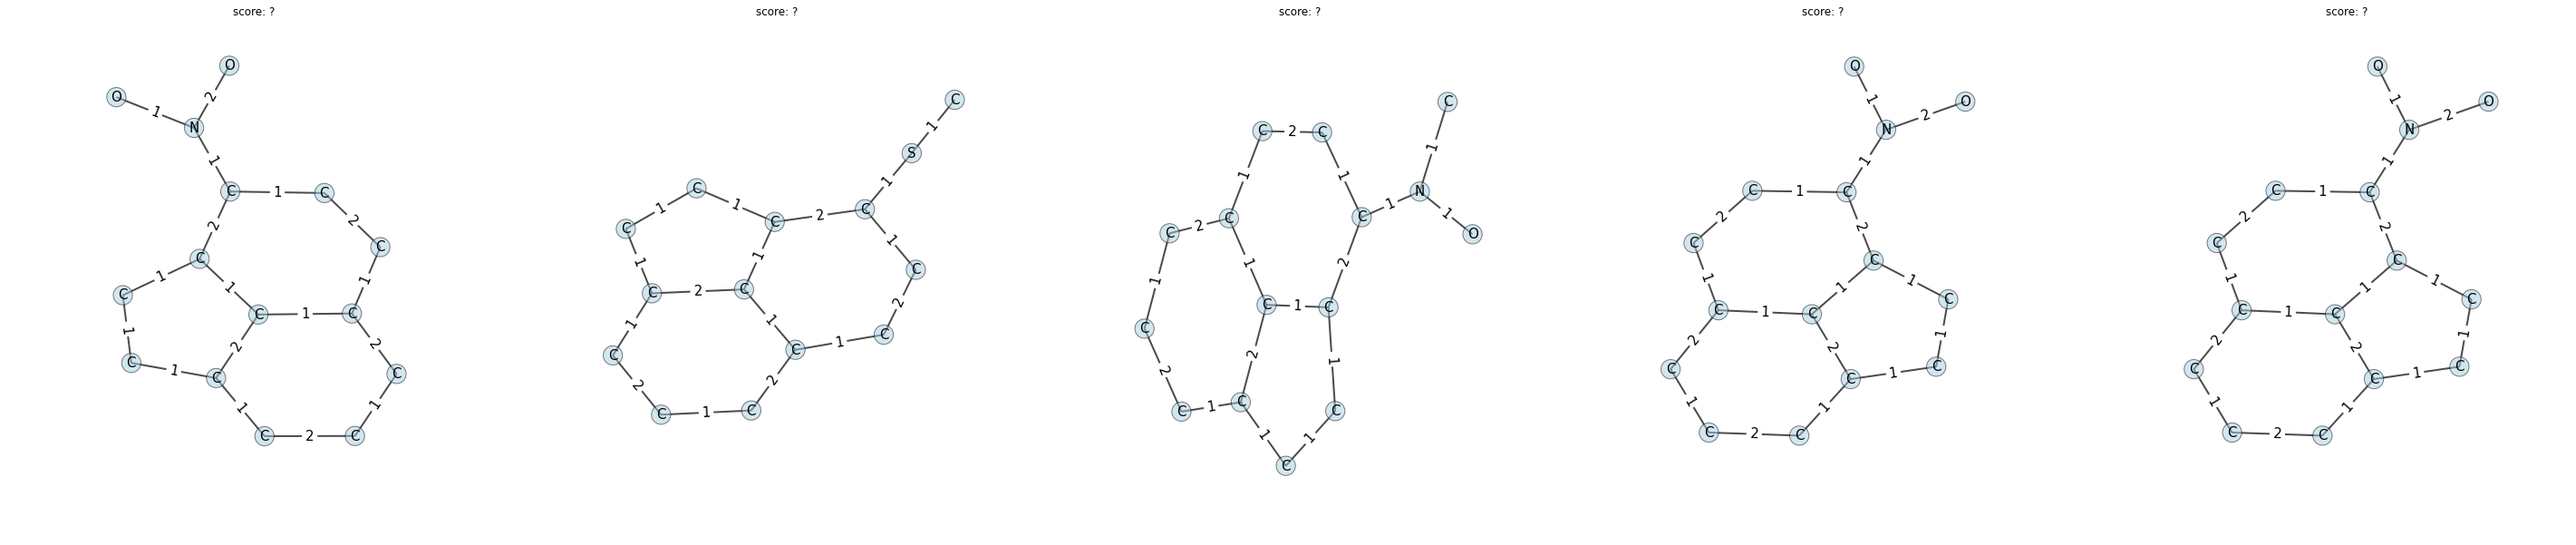

_propose_graph: iteration 0 ; core 0 of 1 ; original_cips tried  0
_propose_graph: iteration 1 ; core 0 of 15 ; original_cips tried  0
_propose_graph: iteration 2 ; core 0 of 2 ; original_cips tried  0
_propose_graph: iteration 3 ; core 0 of 15 ; original_cips tried  0
_propose_graph: iteration 4 ; core 0 of 2 ; original_cips tried  0
_propose_graph: iteration 5 ; core 0 of 5 ; original_cips tried  0
_propose_graph: iteration 6 ; core 0 of 3 ; original_cips tried  0
_propose_graph: iteration 7 ; core 0 of 15 ; original_cips tried  0
_propose_graph: iteration 8 ; core 0 of 15 ; original_cips tried  0
_propose_graph: iteration 9 ; core 0 of 14 ; original_cips tried  0
_propose_graph: iteration 10 ; core 0 of 15 ; original_cips tried  0
_propose_graph: iteration 11 ; core 0 of 2 ; original_cips tried  0
_propose_graph: iteration 12 ; core 0 of 2 ; original_cips tried  0
_propose_graph: iteration 13 ; core 0 of 15 ; original_cips tried  0
_propose_graph: iteration 14 ; core 0 of 2 ; origin

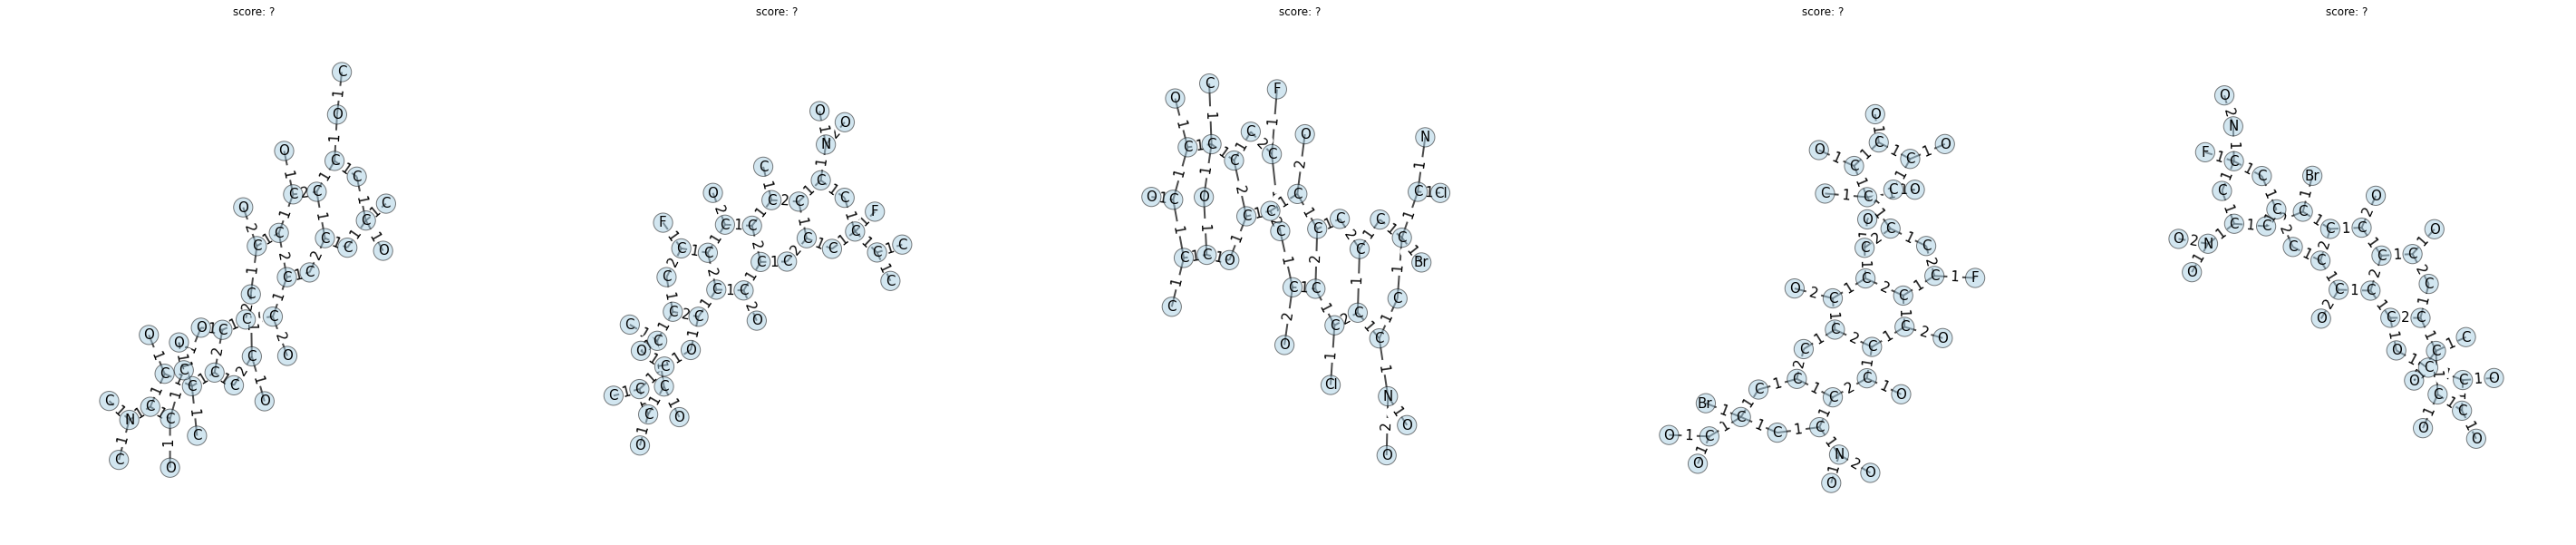

_propose_graph: iteration 0 ; core 0 of 22 ; original_cips tried  0
_propose_graph: iteration 1 ; core 0 of 5 ; original_cips tried  1
_propose_graph: iteration 2 ; core 0 of 3 ; original_cips tried  0
_propose_graph: iteration 3 ; core 0 of 22 ; original_cips tried  0
_propose_graph: iteration 4 ; core 0 of 22 ; original_cips tried  2
_propose_graph: iteration 5 ; core 0 of 6 ; original_cips tried  1
_propose_graph: iteration 6 ; core 0 of 6 ; original_cips tried  0
_propose_graph: iteration 7 ; core 0 of 1 ; original_cips tried  0
_propose_graph: iteration 8 ; core 0 of 6 ; original_cips tried  2
_propose_graph: iteration 9 ; core 0 of 13 ; original_cips tried  0
_propose_graph: iteration 10 ; core 0 of 3 ; original_cips tried  0
_propose_graph: iteration 11 ; core 0 of 6 ; original_cips tried  0
_propose_graph: iteration 12 ; core 0 of 13 ; original_cips tried  0
_propose_graph: iteration 13 ; core 0 of 6 ; original_cips tried  0
_propose_graph: iteration 14 ; core 0 of 3 ; original

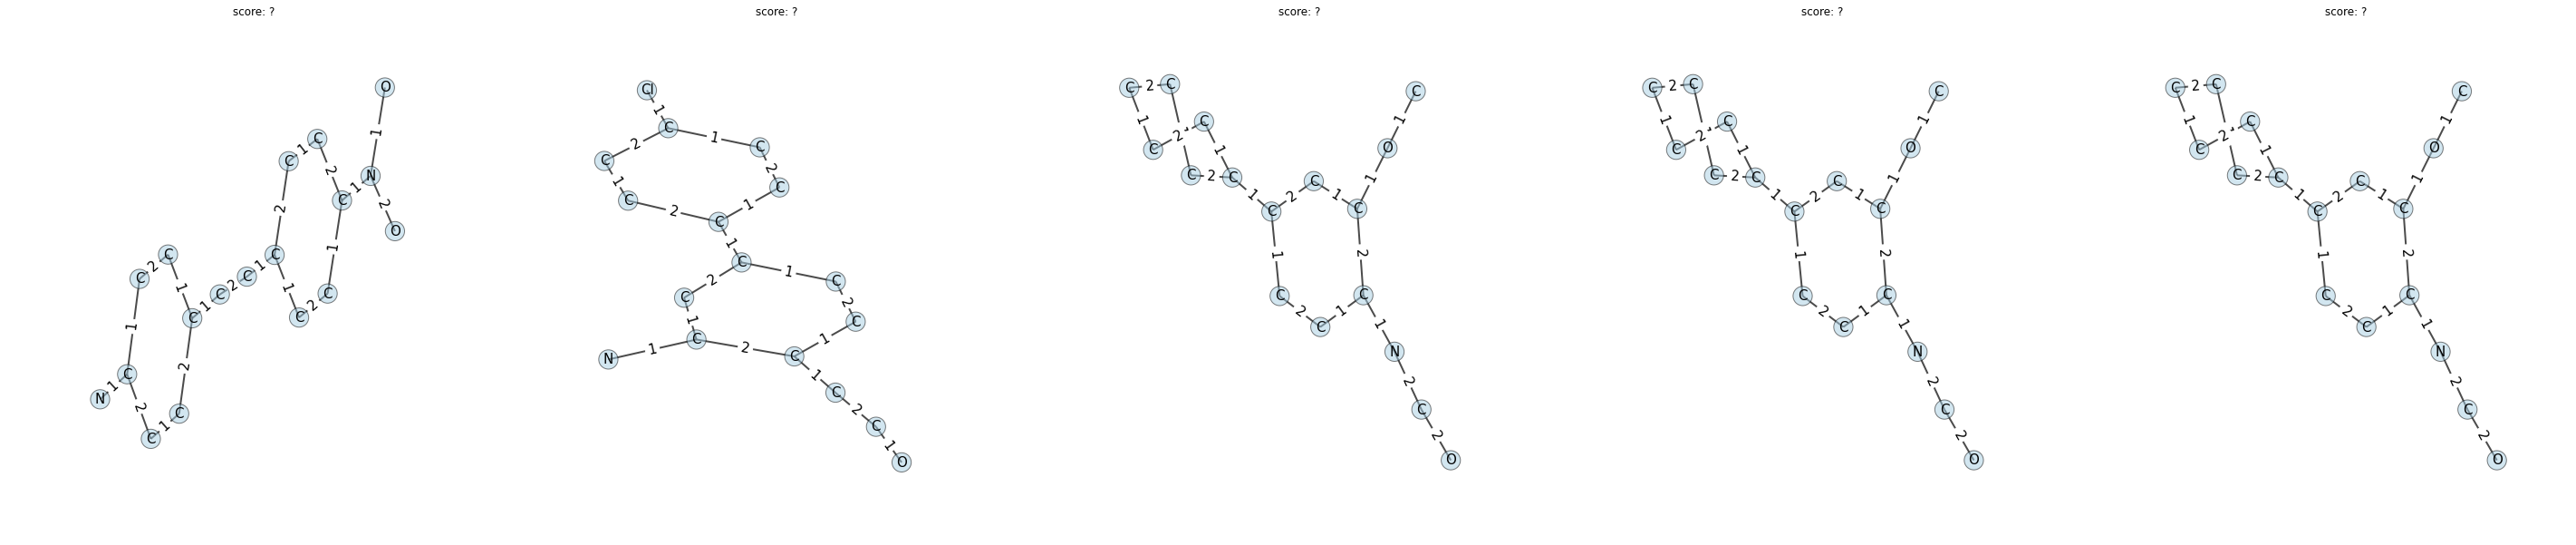

_propose_graph: iteration 0 ; core 0 of 22 ; original_cips tried  0
_propose_graph: iteration 1 ; core 0 of 5 ; original_cips tried  0
_propose_graph: iteration 2 ; core 0 of 22 ; original_cips tried  0
_propose_graph: iteration 3 ; core 0 of 5 ; original_cips tried  2
_propose_graph: iteration 4 ; core 0 of 14 ; original_cips tried  0
_propose_graph: iteration 5 ; core 0 of 3 ; original_cips tried  0
_propose_graph: iteration 6 ; core 0 of 4 ; original_cips tried  0
_propose_graph: iteration 7 ; core 0 of 4 ; original_cips tried  0
_propose_graph: iteration 8 ; core 0 of 4 ; original_cips tried  0
_propose_graph: iteration 9 ; core 0 of 4 ; original_cips tried  0
_propose_graph: iteration 10 ; core 0 of 1 ; original_cips tried  0
_propose_graph: iteration 11 ; core 0 of 22 ; original_cips tried  0
_propose_graph: iteration 12 ; core 0 of 22 ; original_cips tried  0
_propose_graph: iteration 13 ; core 0 of 22 ; original_cips tried  0
_propose_graph: iteration 14 ; core 0 of 1 ; origina

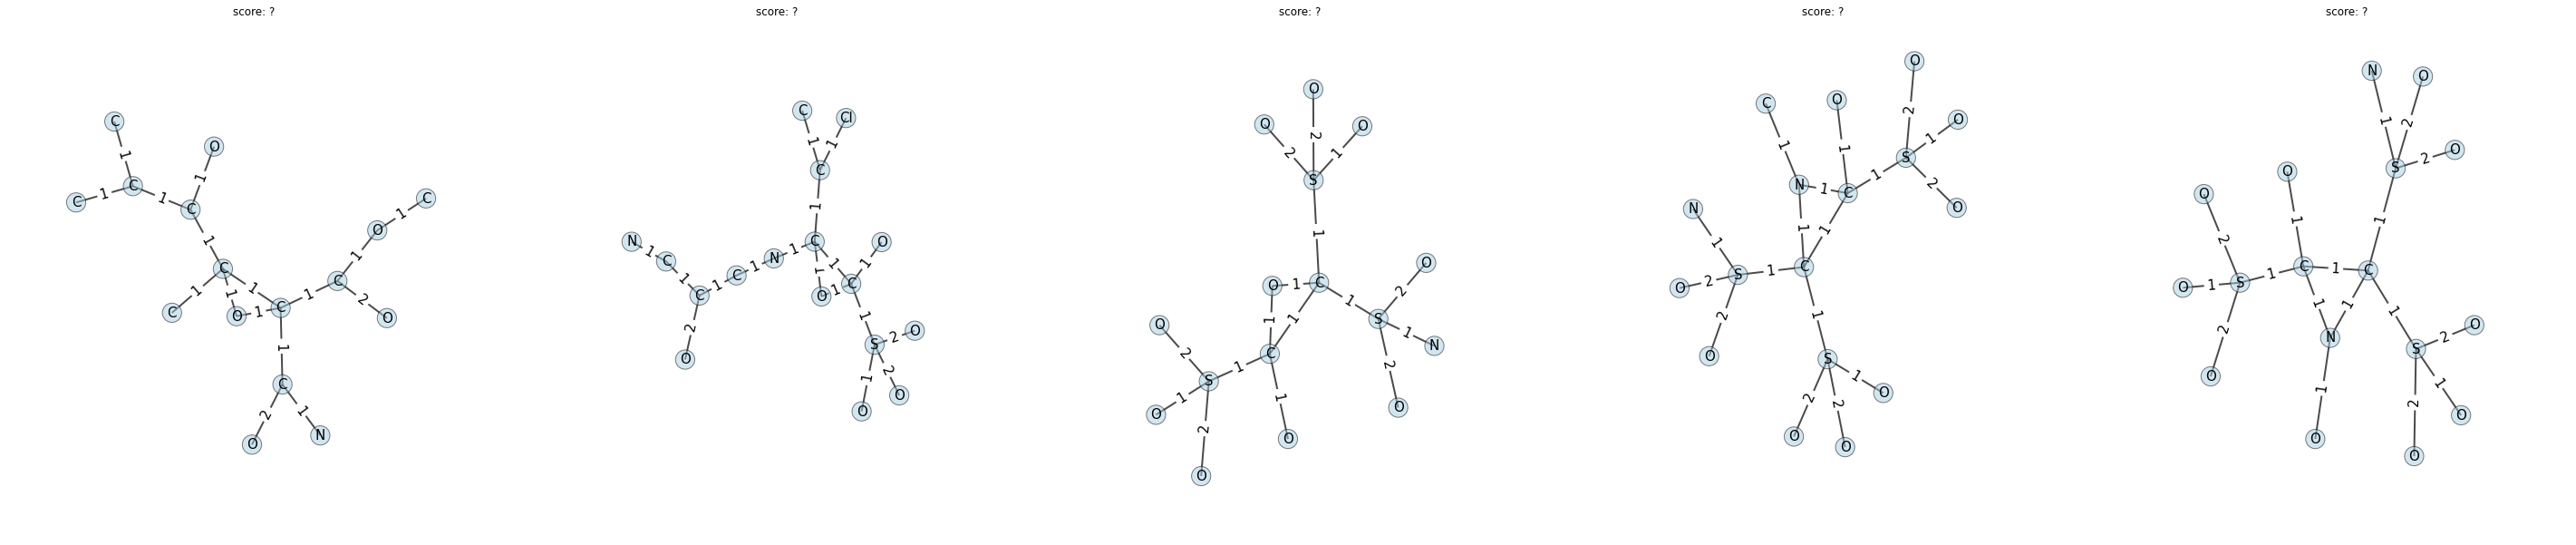

_propose_graph: iteration 0 ; core 0 of 14 ; original_cips tried  0
_propose_graph: iteration 1 ; core 0 of 22 ; original_cips tried  0
_propose_graph: iteration 2 ; core 0 of 22 ; original_cips tried  0
_propose_graph: iteration 3 ; core 0 of 22 ; original_cips tried  0
_propose_graph: iteration 4 ; core 0 of 22 ; original_cips tried  0
_propose_graph: iteration 5 ; core 0 of 14 ; original_cips tried  1
_propose_graph: iteration 6 ; core 0 of 14 ; original_cips tried  1
_propose_graph: iteration 7 ; core 0 of 2 ; original_cips tried  1
_propose_graph: iteration 8 ; core 0 of 13 ; original_cips tried  0
_propose_graph: iteration 9 ; core 0 of 14 ; original_cips tried  0
_propose_graph: iteration 10 ; core 0 of 15 ; original_cips tried  0
_propose_graph: iteration 11 ; core 0 of 14 ; original_cips tried  0
_propose_graph: iteration 12 ; core 0 of 22 ; original_cips tried  0
_propose_graph: iteration 13 ; core 0 of 2 ; original_cips tried  0
_propose_graph: iteration 14 ; core 0 of 22 ; 

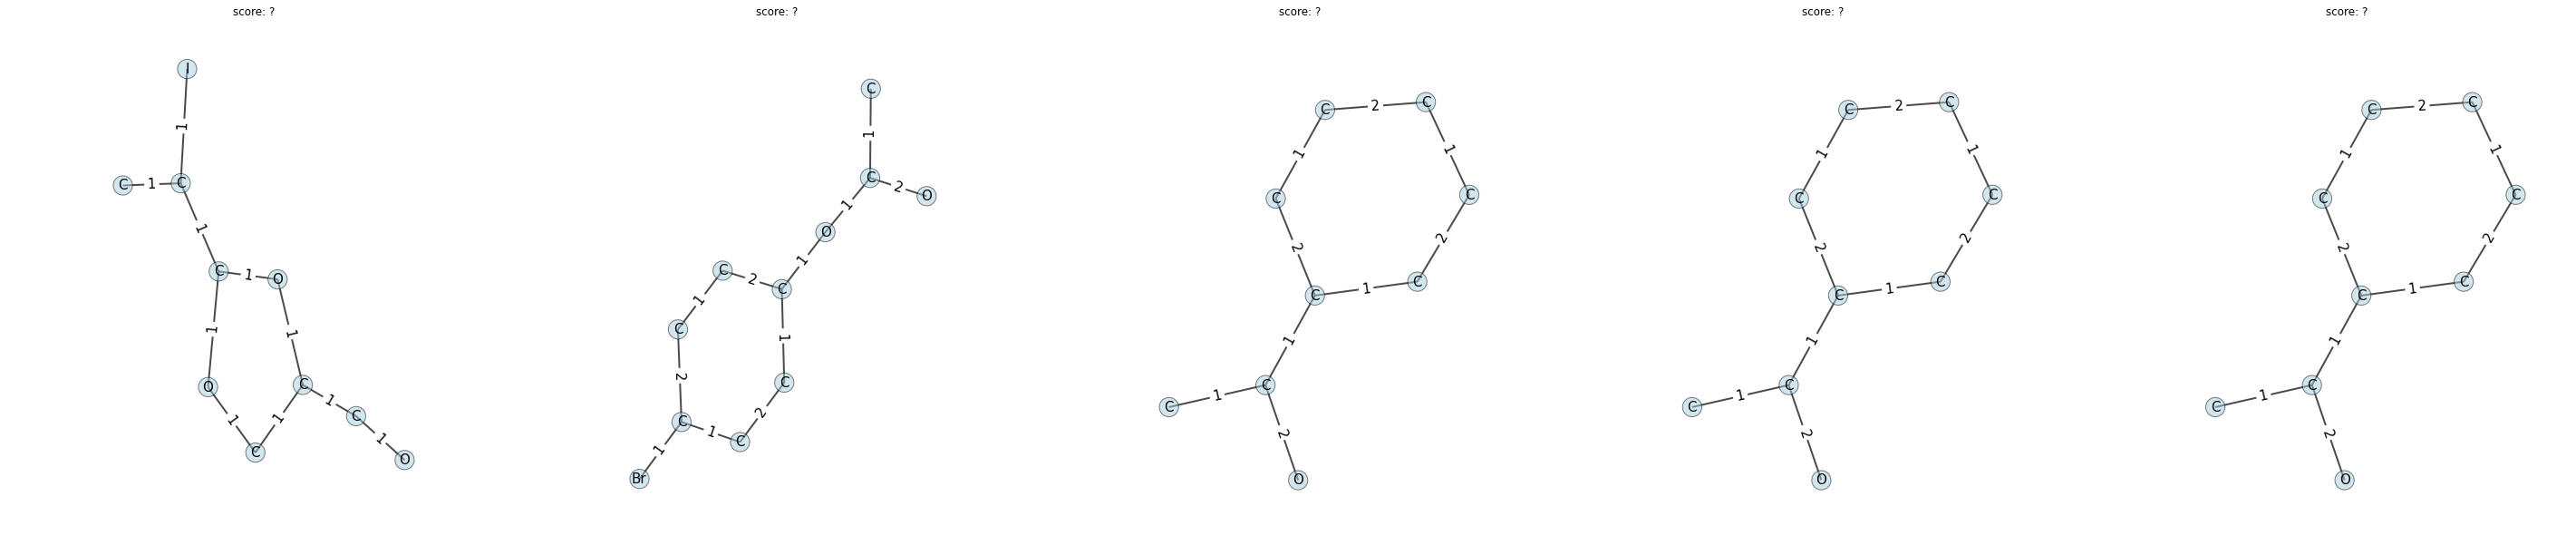

CPU times: user 1min 4s, sys: 1.31 s, total: 1min 6s
Wall time: 1min 8s


In [15]:
%%time
'''
Molecule sampling
'''
import os
os.nice(19)
import graphlearn.utils.draw as draw
import graphlearn.abstract_graphs.molecules as mole
import itertools
#sampler=mole.MolecularSampler()
#sampler.load('tmp/mole_ubergrammar.ge')
graphs = get_graphs()

id_start=15
id_end=id_start+9
graphs = itertools.islice(graphs,id_start,id_end)
n_steps=100

graphs = sampler.sample(graphs,
                        n_samples=5,
                        batch_size=1,
                        n_steps=n_steps,
                        n_jobs=1,
                        quick_skip_orig_cip=True,
                        probabilistic_core_choice=False,
                        burnin=0,
                        improving_threshold=0.5,
                        max_core_size_diff=1,
                        select_cip_max_tries=100,
                        keep_duplicates=True,
                        omit_seed=False)

 
scores=[]
ids=range(id_start,id_end)
for i,graph in enumerate(graphs):
    print 'Graph id: %d'%(ids[i])
    scores.append(graph.graph['sampling_info']['score_history'])
    path_graphs = graph.graph['sampling_info']['graphs_history']
    

    path_graphs= list(path_graphs)
    draw.graphlearn(path_graphs,
                           n_graphs_per_line=5, size=10, 
                           colormap='Paired', invert_colormap=False,node_border=0.5, vertex_color='color_level',
                           vertex_alpha=0.5, edge_alpha=0.7, node_size=450,edge_label='label',
                          headlinehook= draw.get_score_of_graph
                          )
    

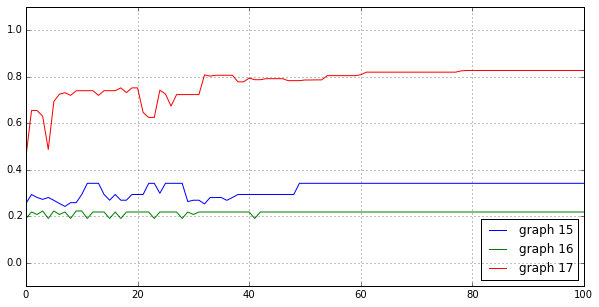

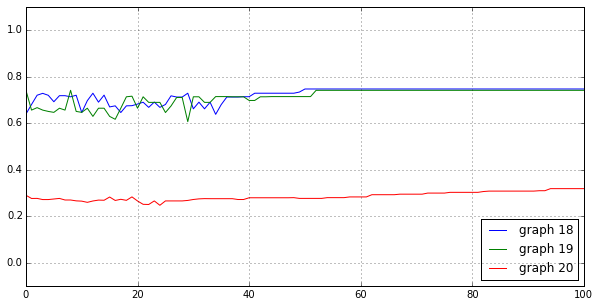

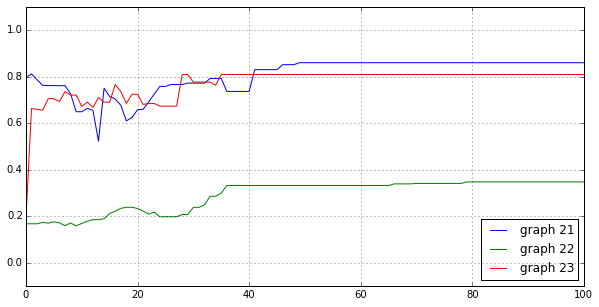

In [16]:
%matplotlib inline
from itertools import islice
import numpy as np
import matplotlib.pyplot as plt
step=1
num_graphs_per_plot=3
num_plots=np.ceil([len(scores)/num_graphs_per_plot])
for i in range(num_plots):
    plt.figure(figsize=(10,5))
    for j,score in enumerate(scores[i*num_graphs_per_plot:i*num_graphs_per_plot+num_graphs_per_plot]):
        data = list(islice(score,None, None, step))
        plt.plot(data, label='graph %d'%(j+i*num_graphs_per_plot+id_start))
    plt.legend(loc='lower right')
    plt.grid()
    plt.ylim(-0.1,1.1)
    plt.show()

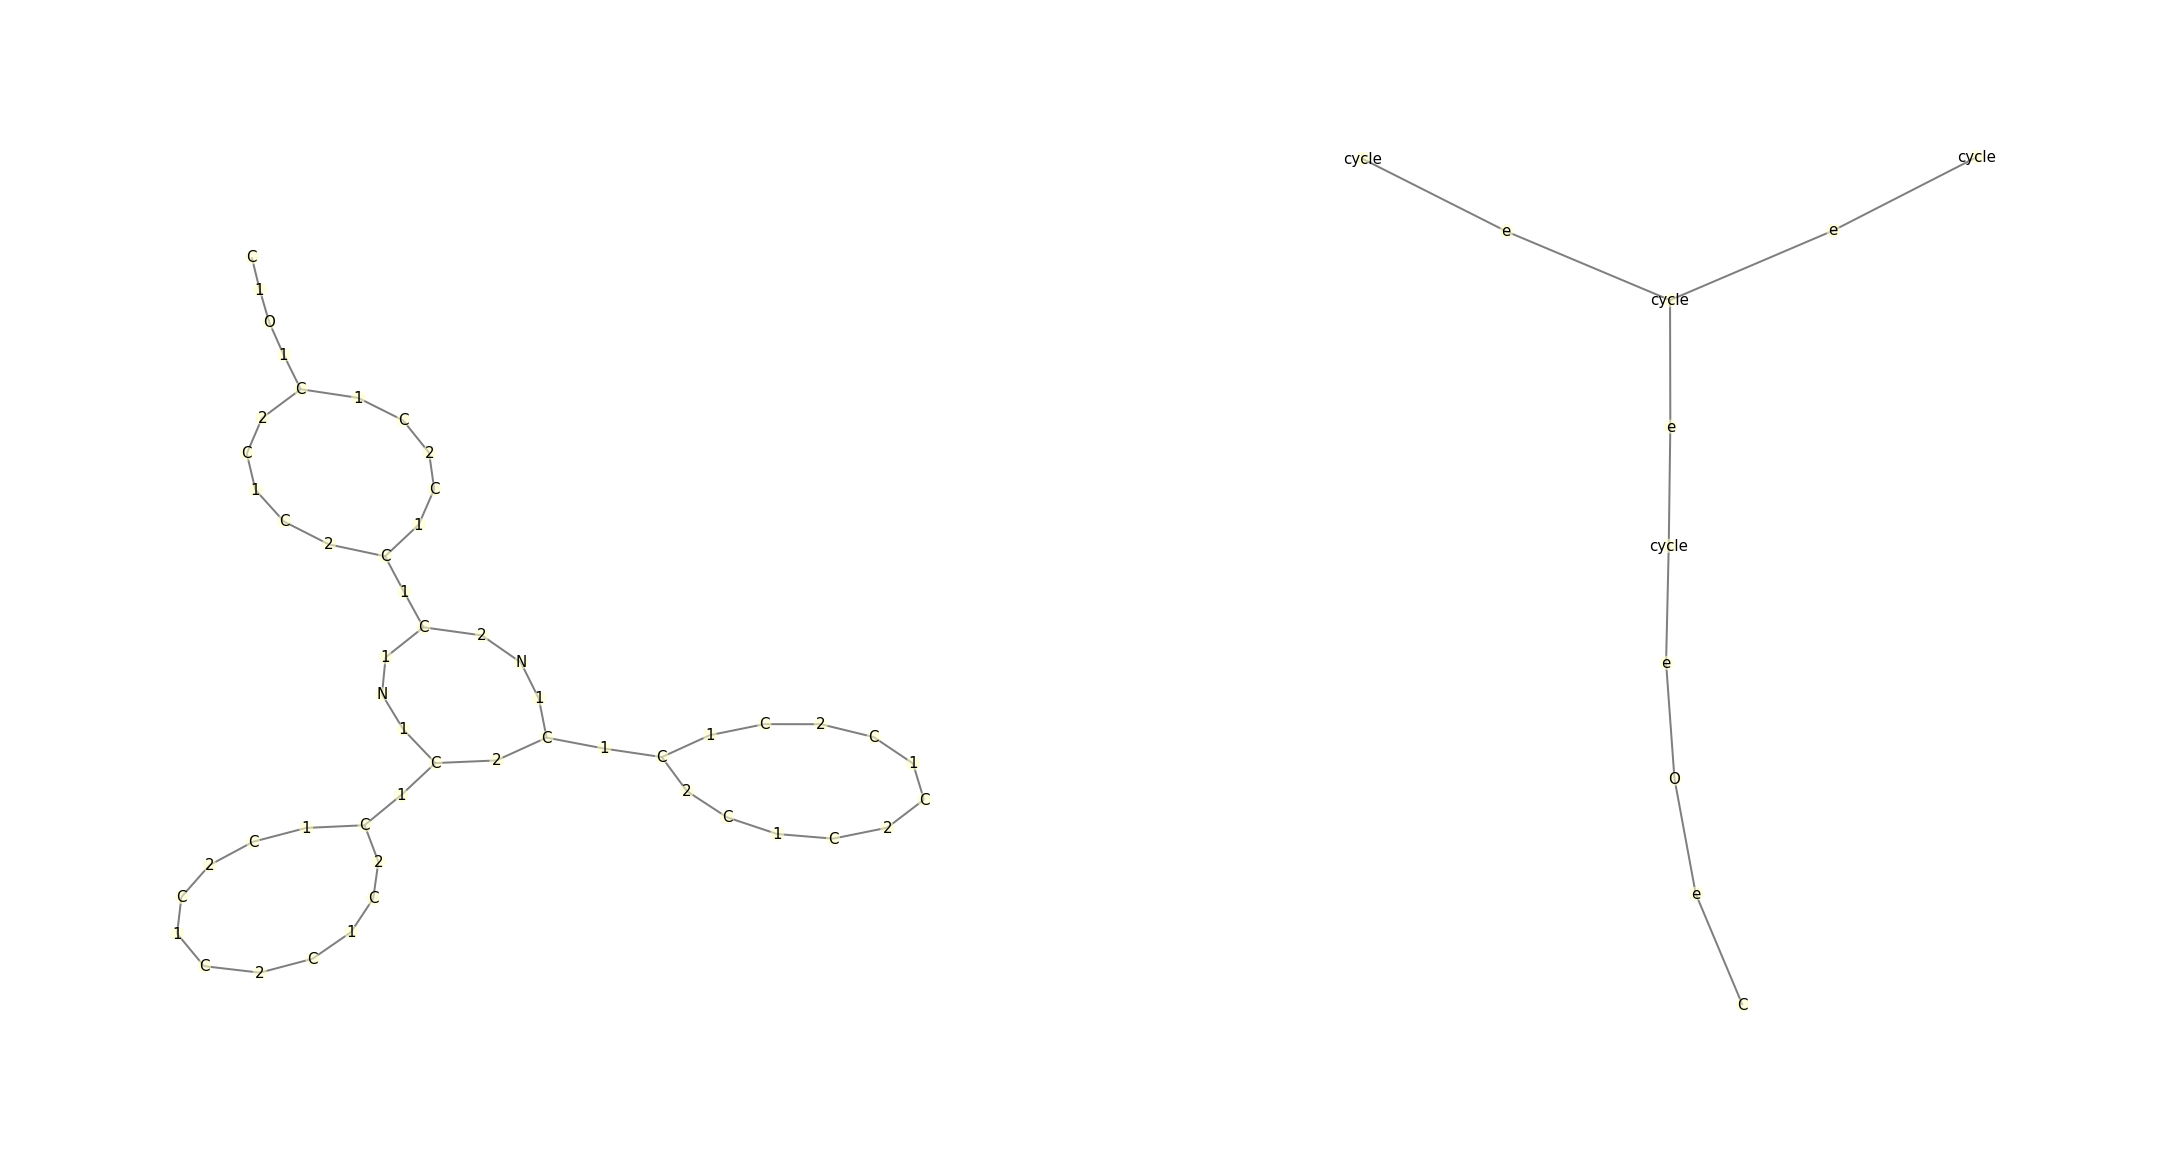

In [6]:
import graphlearn.abstract_graphs.molecules as mole
from graphlearn.utils import draw
from eden.graph import Vectorizer
v=Vectorizer()
from graphlearn.abstract_graphs.molecules import node_to_cycle
import networkx as nx
import eden

def make_abstract(graph):
    '''
    make sure this is not expanded
    '''
    # prepare fast hash function
    def fhash(stuff):
        return eden.fast_hash(stuff, 2 ** 20 - 1)
    
    
    # all nodes get their cycle calculated
    for n, d in graph.nodes(data=True):
        d['cycle'] = list(node_to_cycle(graph, n))
        d['cycle'].sort()
        #if 'parent'in d:
        #    d.pop('parent')
            

    
    # make sure most of the abstract nodes are created.
    abstract_graph = nx.Graph()
    for n, d in graph.nodes(data=True):
        cyclash = fhash(d['cycle'])
        if cyclash not in abstract_graph.node:
            abstract_graph.add_node(cyclash)
            abstract_graph.node[cyclash]['contracted'] = set(d['cycle'])
            abstract_graph.node[cyclash]['node'] = True
            # it is possible that a node belongs to more than 1 cycle, so...
            # each node gets parents
            for e in d['cycle']:
                node = graph.node[e]
                if 'parent' not in node:
                    node['parent'] = set()
                node['parent'].add(cyclash)


    
    #  HERE THE ACTUAL ABSTRACTION BEGINS

    # connect nodes in the abstract graph
    get_element = lambda x: list(x)[0]


    
    # FOR ALL ABSTRACT NODES
    for n, d in abstract_graph.nodes(data=True):
        # FIND A LABEL
        if len(d['contracted']) > 1:
            labels = [ord(graph.node[childid]['label']) for childid in d['contracted']]
            labels.sort()
            d['label'] = "cycle" #fhash(labels)

        else:
            d['label'] = graph.node[get_element(d['contracted'])]['label']

      
 
        # THEN LOOK AT ALL CONTRACTED NODES TO FIND OUT WHAT CONNECTION WE HAVE TO OUR NEIGHBORS
        for base_node in d['contracted']:
            base_neighbors = graph.neighbors(base_node)
            # for all the neighbors
            for neigh in base_neighbors:
                
                
                # find out if we have to build a connector node
                if len(graph.node[neigh]['cycle']) > 1 and len(d['contracted']) > 1:

                    for other in graph.node[neigh]['parent']:
                        if other != n:
                            l = [other, n]
                            l.sort()
                            connector = fhash(l)
                            
                            
                            shared_nodes = abstract_graph.node[other]['contracted'] & d['contracted']
                            if len(shared_nodes)==0:
                                label='e'
                            else:
                                labels = [ord(graph.node[sid]['label']) for sid in shared_nodes]
                                labels.sort()
                                share_hash = fhash(labels)
                                label='share:'+str(share_hash)
                            abstract_graph.add_edge(other,n,label=label)
                            '''
                            if connector not in abstract_graph.node:
                                # we need to consider making the edge the actual intersect of the two...

                                abstract_graph.add_node(connector)
                                abstract_graph.node[connector]['edge'] = True

                                # abstract_graph.node[connector]['label']='edge'
                                shared_nodes = abstract_graph.node[other]['contracted'] & d['contracted']
                                labels = [ord(graph.node[sid]['label']) for sid in shared_nodes]
                                labels.sort()
                                share_hash = fhash(labels)


                                abstract_graph.node[connector]['label'] = "shared" + str(share_hash)

                                abstract_graph.add_edge(other, connector)
                                abstract_graph.add_edge(connector, n)
                            '''
                else:
                    for e in graph.node[neigh]['parent']:
                        abstract_graph.add_edge(n, e, label='e')
    return abstract_graph




def graphor(base,abstr,nested=True):
    g= nx.disjoint_union(base, abstr)
    node_id= len(g)

    for n,d in g.nodes(data=True):
        if 'contracted' in d and 'edge' not in d:
            for e in d['contracted']:
                if 'edge' not in g.node[e]:
                    # we want an edge from n to e
                    g.add_node(node_id,edge=True,label='e')
                    g.add_edge( n, node_id, nesting=True)
                    g.add_edge( node_id, e, nesting=True)
                    #g.add_edge( n, e, nesting=True)
                    node_id+=1
    return g
    


gr=get_graphs()
for i in range(1):
    g=gr.next()
    ab=make_abstract(g)
    
    g=v._edge_to_vertex_transform(g)
    ab=v._edge_to_vertex_transform(ab)
    zz=graphor(g,ab)
    draw.graphlearn([g,ab], size=20)
    v.transform_single(zz)

    


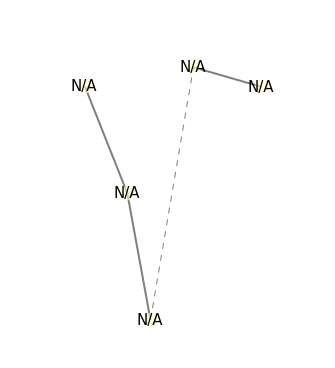

[(2, 3, {'nesting': True})]


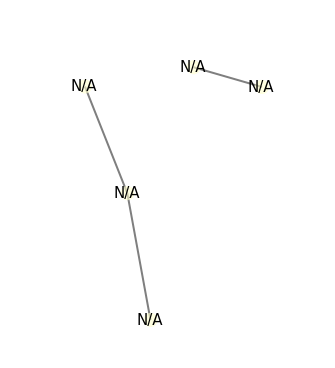

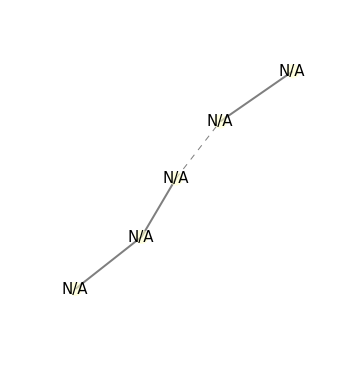

In [1]:
%matplotlib inline
import networkx as nx
from graphlearn.utils import draw

'''
title arg so that a graph can decide which graph.graph[thing] is the title.
'''

g=nx.path_graph(5)
g[2][3]["nesting"]=True
draw.graphlearn(g,ignore_for_layout="nesting")

"try to remove edges"
eset=[(a,b,d) for (a,b,d) in g.edges(data=True) if "nesting" in d]
print eset
g.remove_edges_from(eset)
draw.graphlearn(g)

'and attach later'
g.add_edges_from(eset)
draw.graphlearn(g)


In [1]:
import eden.util.display as draw

print draw.__file__

dir(draw)



/home/ikea/EDeN/eden/util/display.py


['FontProperties',
 'SetEncoder',
 '__builtins__',
 '__doc__',
 '__file__',
 '__name__',
 '__package__',
 'dendrogram',
 'draw_adjacency_graph',
 'draw_graph',
 'draw_graph_row',
 'draw_graph_set',
 'json',
 'json_graph',
 'nx',
 'plot_embedding',
 'plot_embeddings',
 'plt',
 'serialize_graph']